# Towards Automated and Customized Loan Approval Criteria Using Segmented Logistic Classification Models
## Max Sydow
### Masters of Science in Data Analytics
### Western Governors University, Capstone Project, August 2022.


# Introduction, Research Question and Hypothesis.

Credit score, income, previous debt amount and other numerically continuous attributes are typically used when determining the amount to approve for a loan.  Instead of using a standard criterion in which a hierarchy of factors are applied for all loan approval decisions it may be more accurate to tailor differing orders of such factors based on certain groupings of other borrower traits.  For example, years of credit history may be the most influential indicator of whether a loan will be repaid on time for a homeowner who has been at their current job for over 10 years.  Income may be the biggest driver for someone who rents and is seeking debt consolidation.  Establishing more nuanced approval requirements may help lenders provide better individualized service to their customers and provide loan officers with better means of determining approval. 

Almost any data set that has at least one continuous, one binary and one categorical column can be subsetted according to the unique values in the categorical column.  Individual logistic classigication (logit) models can be fitted for each subset.  If the models accuracy is reasonably good then the slope of the coefficient for the predictor variable gives an indication of strength of influence.  When separate multiple logistic classification models are fitted to grouped subsets of a larger data set by unique values in categorical columns, will there be more than 1 statistically significant predictor variable amongst more than 1 categorical column so that the slope coeffiecents of log-transformed equations of fit can be used to summarize at least one difference in variable impact across segments? 

A hypothesis can be constructed from this question.  Amongst several multiple logistic classification models fitted from this data grouped according to unique values in categorical columns, at least 2 models can be found with at least 2 predictor variables that have different coefficients, and statistically significant predictive accuracy as measured using AUC scores in recursive feature elimination. 

Accuracy could be used instead of AUC scores in the RFE process to get the best fitting models.  (Brownlee, 2020).  ROC_AUC (reciever operating characteristic area under curve, or AUC for short) scores are measured from the ratio of true positive to false negative predictions and so give an additional indication of how a model compares to random guessing.  Accuracy is only measured by comparing predictions from a trained model to test data, regardless of how randomly distributed the test data may actually be.  Nevertheless, accuracy will be used when examining the results and implications of the models obtained. 

# Data Collection and Summary

A Bank Loan Status Data Set was found on kaggle, with the objective of having participants predict future loan status using classification models.  The site posting did not indicate if this is real or mock data, but the kinds of columns included seem like realistic attributes that a bank or lender would track.  It would not be too much of a stretch of the imagination to see how the methods of analysis used in this treatment could be applied to real data.  The csv data sets were downloadable as test and train sets with 100,000 rows in train, and 10,000 rows in test.  They will be combined and split using a different proportion later.  This data was already mostly prepared and fairly easy to load and prepare.  Real data in an organization may be stored in a database and require some SQL or other form of ETL method to assemble such a table.  

In [1]:
# read initial data sets, store as dataframe
import pandas as pd
credit_train = pd.read_csv('C:/Users/maxgs/MSDA/D214/credit_train.csv')
credit_test = pd.read_csv('C:/Users/maxgs/MSDA/D214/credit_test.csv')
credit = pd.concat([credit_train, credit_test])
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [2]:
# column summary
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110867 entries, 0 to 10352
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           110000 non-null  float64
 4   Term                          110000 non-null  object 
 5   Credit Score                  88865 non-null   float64
 6   Annual Income                 88865 non-null   float64
 7   Years in current job          105351 non-null  object 
 8   Home Ownership                110000 non-null  object 
 9   Purpose                       110000 non-null  object 
 10  Monthly Debt                  110000 non-null  float64
 11  Years of Credit History       110000 non-null  float64
 12  Months since last delinquent  51553 non-null 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# importing packages that will be used 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pylab
from pylab import xticks, yticks

# Data Preparation

From the above summary, Loan ID and Customer ID are identifier columns and aren't needed.  The Months since last delinquent column is over half empty, so that column can be dropped.

In [5]:
# drop identifier columns
credit = credit.drop(columns = ['Loan ID', 'Customer ID', 'Months since last delinquent'])

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110867 entries, 0 to 10352
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        110000 non-null  float64
 2   Term                       110000 non-null  object 
 3   Credit Score               88865 non-null   float64
 4   Annual Income              88865 non-null   float64
 5   Years in current job       105351 non-null  object 
 6   Home Ownership             110000 non-null  object 
 7   Purpose                    110000 non-null  object 
 8   Monthly Debt               110000 non-null  float64
 9   Years of Credit History    110000 non-null  float64
 10  Number of Open Accounts    110000 non-null  float64
 11  Number of Credit Problems  110000 non-null  float64
 12  Current Credit Balance     110000 non-null  float64
 13  Maximum Open Credit        109

Since Loan Status is the column that we want to make predictions on, any rows that have missing values for this column should be dropped.  

In [7]:
credit = credit.dropna(subset=['Loan Status'])

In [8]:
credit['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

Identify continuous, categorical, and numerical columns with low cardinality that may be transformed to categories.  There are only 2 data types in use, so Object indicates categorical columns, and float64 indicates numerical. 

In [9]:
credit.select_dtypes(include='object').nunique()

Loan Status              2
Term                     2
Years in current job    11
Home Ownership           4
Purpose                 16
dtype: int64

In [10]:
credit.select_dtypes(include='float64').nunique()

Current Loan Amount          22004
Credit Score                   324
Annual Income                36174
Monthly Debt                 65765
Years of Credit History        506
Number of Open Accounts         51
Number of Credit Problems       14
Current Credit Balance       32730
Maximum Open Credit          44596
Bankruptcies                     8
Tax Liens                       12
dtype: int64

Number of Credit Problems, Bankruptcies and Tax Liens have relatively low numbers of unique values.  A multiple logistic classification model can accept a mixture of continuous and categorical predictor variables as long as categories are mapped to numbers.  There seems no need to use these three columns for segmentation, and since they are already in numerical form, they can be kept as predictor columns.  The categorical columns to use for grouping are just those identified by data type: Term, Years in current job, Home Ownership and Purpose.

In [11]:
credit.select_dtypes(include='object').nunique().sum()

35

In [12]:
credit_num = credit.select_dtypes(include='float64').columns

There are a total of 35 unique values amongst categorical columns, and hence 35 different groupings are possible.  The credit dataframe will first be grouped by column, then by unique value.  Each of these subsets may contain a different number of missing values or outliers amongst the other numerical columns.  For one subset it may be more appropriate to impute missing values by mean, for another there may be a large enough portion of missing values to justify dropping the entire column.  These steps in data cleaning should be performed on each subset for better individual model fitting.  In other words, a one size fits all approach may cause more harm than good.  Since each subset is itself a dataframe, the collection of subsets will be stored as a dictionary object.  The name of subset will be used as the dictionary key, so that the individual dataframe values can be referenced.  The __subset()__ function will be used to do this.  First, column names and unique categorical values will be "cleaned" so that they are all strings without spaces or special characters.  This makes it easier to manipulate dictionary keys.

In [13]:
print(credit.columns)

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')


In [14]:
# clean up column names so they have no spaces
for col in credit.columns:
    new_col = col.replace(' ', '_')
    credit.columns = credit.columns.str.replace(col, new_col)
print(credit.columns)

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')


In [15]:
# Reorder columns so that categorical columns appear first
credit = credit[['Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose', 'Loan_Status',
                'Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 
                'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
                'Number_of_Credit_Problems', 'Current_Credit_Balance',
                'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']]

In [16]:
credit_num = credit[['Loan_Status', 'Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 
                'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
                'Number_of_Credit_Problems', 'Current_Credit_Balance',
                'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']]
                

In [17]:
# check for pesky spaces in unique values too
col_list = ['Loan_Status', 'Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']
for col in col_list:
    print(credit[col].unique())

['Fully Paid' 'Charged Off']
['Short Term' 'Long Term']
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


In [18]:
# need to replace spaces in column values
for col in col_list:
    for val in credit[col].unique():
        #credit[col] = credit[credit[col] != 'nan']
        credit[col] = credit[col].str.replace(' ', '_')
    print(credit[col].unique())

['Fully_Paid' 'Charged_Off']
['Short_Term' 'Long_Term']
['8_years' '10+_years' '3_years' '5_years' '<_1_year' '2_years' '4_years'
 '9_years' '7_years' '1_year' nan '6_years']
['Home_Mortgage' 'Own_Home' 'Rent' 'HaveMortgage']
['Home_Improvements' 'Debt_Consolidation' 'Buy_House' 'other'
 'Business_Loan' 'Buy_a_Car' 'major_purchase' 'Take_a_Trip' 'Other'
 'small_business' 'Medical_Bills' 'wedding' 'vacation'
 'Educational_Expenses' 'moving' 'renewable_energy']


In [19]:
# transform Loan_Status column to 1's and 0s
Loan_Status_mapping = {'Fully_Paid' : 1, 'Charged_Off' : 0}
credit['Loan_Status'] = credit['Loan_Status'].map(Loan_Status_mapping)

In [20]:
credit['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [21]:
# function to subset dataframes and store in dictionary
# removes subsets where categorical column names have missing values

col_list = ['Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']
no_col_list = ['Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']

def subset(df):
    df_dict = {}
    for col in col_list:
        drop_df = df
        for no_col in no_col_list:
            if col != no_col:
                drop_df = drop_df.drop([no_col], axis=1)
        name = drop_df[col].unique()
        for n in name:
            if str(n) != 'nan':
                name = str(col + "_" + str(n))
                new_df = drop_df[drop_df[col] == str(n)]
                df_dict[name] = new_df
            
    return(df_dict)

In [22]:
# apply subset function to credit data frame
credit_subsets = subset(credit)

In [23]:
# overview of subsets
print('Number of subsets: ', len(list(credit_subsets.keys())))
print('Data frame subsets: ')
print(list(credit_subsets.keys()))

Number of subsets:  33
Data frame subsets: 
['Term_Short_Term', 'Term_Long_Term', 'Years_in_current_job_8_years', 'Years_in_current_job_10+_years', 'Years_in_current_job_3_years', 'Years_in_current_job_5_years', 'Years_in_current_job_<_1_year', 'Years_in_current_job_2_years', 'Years_in_current_job_4_years', 'Years_in_current_job_9_years', 'Years_in_current_job_7_years', 'Years_in_current_job_1_year', 'Years_in_current_job_6_years', 'Home_Ownership_Home_Mortgage', 'Home_Ownership_Own_Home', 'Home_Ownership_Rent', 'Home_Ownership_HaveMortgage', 'Purpose_Home_Improvements', 'Purpose_Debt_Consolidation', 'Purpose_Buy_House', 'Purpose_other', 'Purpose_Business_Loan', 'Purpose_Buy_a_Car', 'Purpose_major_purchase', 'Purpose_Take_a_Trip', 'Purpose_Other', 'Purpose_small_business', 'Purpose_Medical_Bills', 'Purpose_wedding', 'Purpose_vacation', 'Purpose_Educational_Expenses', 'Purpose_moving', 'Purpose_renewable_energy']


In [24]:
# preview of one subset
credit_subsets['Term_Short_Term'].head()

,Term,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Short_Term,1,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Short_Term,1,262328.0,NaN,NaN,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Short_Term,1,99999999.0,741.0,2231892.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
4,Short_Term,1,176220.0,NaN,NaN,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
5,Short_Term,0,206602.0,7290.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0


In [25]:
# make sure specific one unique categorical value for this subset
credit_subsets['Term_Short_Term']['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [26]:
credit.dtypes

Term                          object
Years_in_current_job          object
Home_Ownership                object
Purpose                       object
Loan_Status                    int64
Current_Loan_Amount          float64
Credit_Score                 float64
Annual_Income                float64
Monthly_Debt                 float64
Years_of_Credit_History      float64
Number_of_Open_Accounts      float64
Number_of_Credit_Problems    float64
Current_Credit_Balance       float64
Maximum_Open_Credit          float64
Bankruptcies                 float64
Tax_Liens                    float64
dtype: object

In [27]:
# subset predictor variables
pred_cols = list(credit.select_dtypes(include='float64'))

In [28]:
print(pred_cols)

['Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts', 'Number_of_Credit_Problems', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']


## Data cleaning: outliers and missing values

The data cleaning process for each subset is basically the same, with some exceptions that are discussed below and will become apparent in the treatment.  Missing values can be imputed using a measure of center.  Histogram distributions can indicate whether to use mean or median as imputation value.  If a distribution is normal shaped, then the mean can be used.  If the distribution is skewed then the median should be used, since it is less sensitive to changes.  The __replace_mean()__ and __replace_median()__ functions were made for these purposes.  In some instances it was necessary to zoom in on some distributions to see their shape more clearly, and in others a value count summary was used to determine that a column could be dropped since it contained only one unique value.

Outliers can be identified using inter-quartile range (IQR) thresholds; any value outside Q3 + 1.5xIQR or Q1 - 1.5xIQR can be removed.  Distributions and outlier counts may change after normalizing the data, so mitigating them should occur with the raw numbers.  Given the large sizes of some of the subsets, a sizeable number of rows may still be available after dropping all outliers.  The function __remove_outliers()__ does just that, and prints the number of outliers which were removed.  Boxplots are included for each subset to give a visual indication of outlier counts.

Finally, the data will be normalized using sklearn's MinMaxScaler within the __normalize()__ function on each dataframe.  This function transforms each numerical column according to its range so that the minimum aligns with 0, and maximum with 1.  (Scikit Learn, n.d.)  Normalization ensures that the scales for all predictor and target variables are on the same scale, and therefore so are the coefficients.  If this were not the case, then using the coefficients as indicators of influence strength may provide misleading conclusions.  

In [29]:
def normalize(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled = scaler.fit_transform(df)
    norm_df = pd.DataFrame(scaled, columns = df.columns)
    
    return(norm_df)

In [30]:
def replace_mean(df):
    #df.drop(columns = df.columns[0], axis=1, inplace=True)
    for col in pred_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    return(df)
    

In [31]:
def replace_median(df):
    #df.drop(columns = df.columns[0], axis=1, inplace=True)
    for col in pred_cols:
        df[col] = df[col].fillna(df[col].median())
    
    return(df)

In [32]:
# function to identify number of outliers per column
def remove_outliers(df):
    cont_cols = df.select_dtypes(include='float64').columns
    # Copy of df
    new_df = df.copy()
    init_shape = new_df.shape
    # For each column
    for c in cont_cols:
        q1 = new_df[c].quantile(.25)
        q3 = new_df[c].quantile(.75)
        col_iqr = q3 - q1
        col_max = q3 + 1.5 * col_iqr
        col_min = q1 - 1.5 * col_iqr
        # Filter data without outliers and ignoring nan
        mean = new_df[c].mean()
       #print(mean)
        
        if True:
            filtered_df = new_df[(new_df[c] <= col_max) & (new_df[c] >= col_min)]
            n_out = new_df.shape[0] - filtered_df.shape[0] 
            print('Column ', c, ' had ', n_out, 'outliers removed.')
            
    return(filtered_df)
 

# Subsets

### Term

#### 1. Short_Term

In [33]:
Term_Short_Term = credit_subsets['Term_Short_Term'].drop(credit_subsets['Term_Short_Term'].columns[0], axis=1)
Term_Short_Term.head(5)

,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,NaN,NaN,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,741.0,2231892.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
4,1,176220.0,NaN,NaN,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
5,0,206602.0,7290.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA0EBD860>,
      dtype=object)

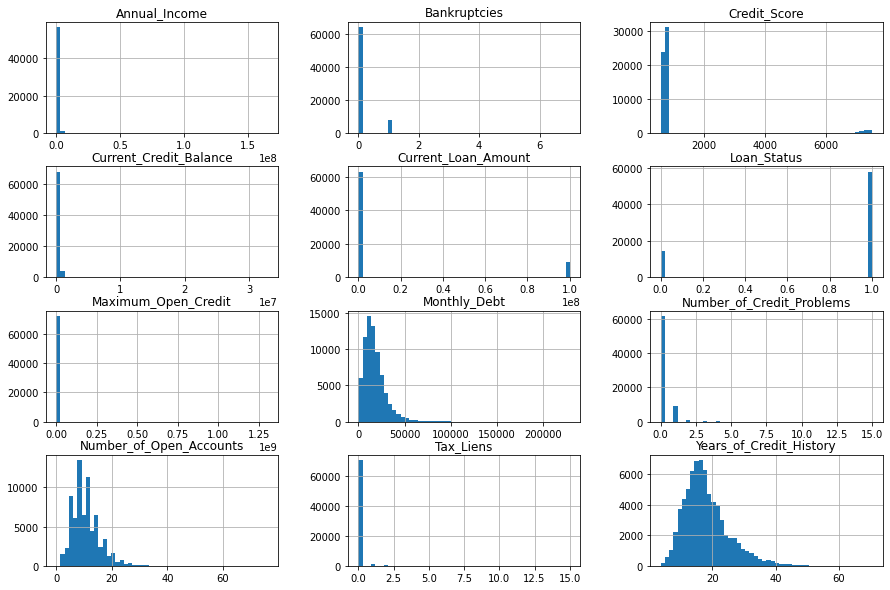

In [34]:
# Histograms for each column to see shape of distribution
Term_Short_Term.hist(bins=50, figsize=(15, 10))

The Maximum_Open_Credit column needs a closer look, since the distribution is not clear from the x-axis range on these plots.

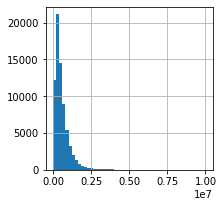

In [35]:
Term_Short_Term['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

It is skewed, like the others, so the median can be used to impute missing values.  

In [36]:
# replace missing values with median
Term_Short_Term = replace_median(Term_Short_Term)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

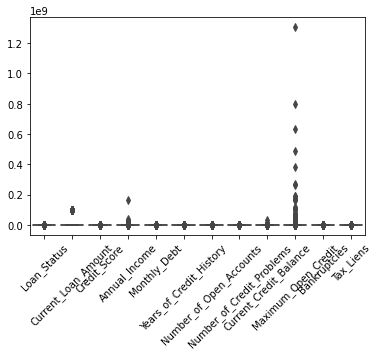

In [37]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Term_Short_Term)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [38]:
# remove outliers
Term_Short_Term = remove_outliers(Term_Short_Term)

Column  Current_Loan_Amount  had  9167 outliers removed.
Column  Credit_Score  had  5394 outliers removed.
Column  Annual_Income  had  5182 outliers removed.
Column  Monthly_Debt  had  2578 outliers removed.
Column  Years_of_Credit_History  had  2248 outliers removed.
Column  Number_of_Open_Accounts  had  1949 outliers removed.
Column  Number_of_Credit_Problems  had  10501 outliers removed.
Column  Current_Credit_Balance  had  4229 outliers removed.
Column  Maximum_Open_Credit  had  4370 outliers removed.
Column  Bankruptcies  had  8362 outliers removed.
Column  Tax_Liens  had  1412 outliers removed.


Now that missing values have been imputed and outliers removed, each column can be normalized.  

In [39]:
Term_Short_Term = normalize(Term_Short_Term)

In [40]:
# check for no missing values
Term_Short_Term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70796 entries, 0 to 70795
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                70796 non-null  float64
 1   Current_Loan_Amount        70796 non-null  float64
 2   Credit_Score               70796 non-null  float64
 3   Annual_Income              70796 non-null  float64
 4   Monthly_Debt               70796 non-null  float64
 5   Years_of_Credit_History    70796 non-null  float64
 6   Number_of_Open_Accounts    70796 non-null  float64
 7   Number_of_Credit_Problems  70796 non-null  float64
 8   Current_Credit_Balance     70796 non-null  float64
 9   Maximum_Open_Credit        70796 non-null  float64
 10  Bankruptcies               70796 non-null  float64
 11  Tax_Liens                  70796 non-null  float64
dtypes: float64(12)
memory usage: 6.5 MB


In [41]:
Term_Short_Term.describe()

,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,70796.000000,70796.000000,70796.000000,70796.000000,70796.000000,70796.000000,70796.000000,70796.000000,70796.000000,70796.000000,70796.000000,70796.0
mean,0.802574,0.129172,0.057025,0.007245,0.083736,0.215179,0.142935,0.020280,0.008241,0.000549,0.017214,0.0
std,0.398060,0.332127,0.182213,0.006091,0.056588,0.106083,0.065059,0.056733,0.010719,0.005441,0.050586,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.001418,0.019209,0.004779,0.045199,0.142003,0.092105,0.000000,0.003147,0.000194,0.000000,0.0
50%,1.000000,0.002341,0.020942,0.006351,0.072794,0.195815,0.131579,0.000000,0.005779,0.000332,0.000000,0.0
75%,1.000000,0.004308,0.022386,0.008205,0.108940,0.267564,0.171053,0.000000,0.010190,0.000563,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### 2. Long_Term

In [42]:
# assign name to dictionary element dataframe
Term_Long_Term = credit_subsets['Term_Long_Term'].drop(credit_subsets['Term_Long_Term'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB96616A0>,
      dtype=object)

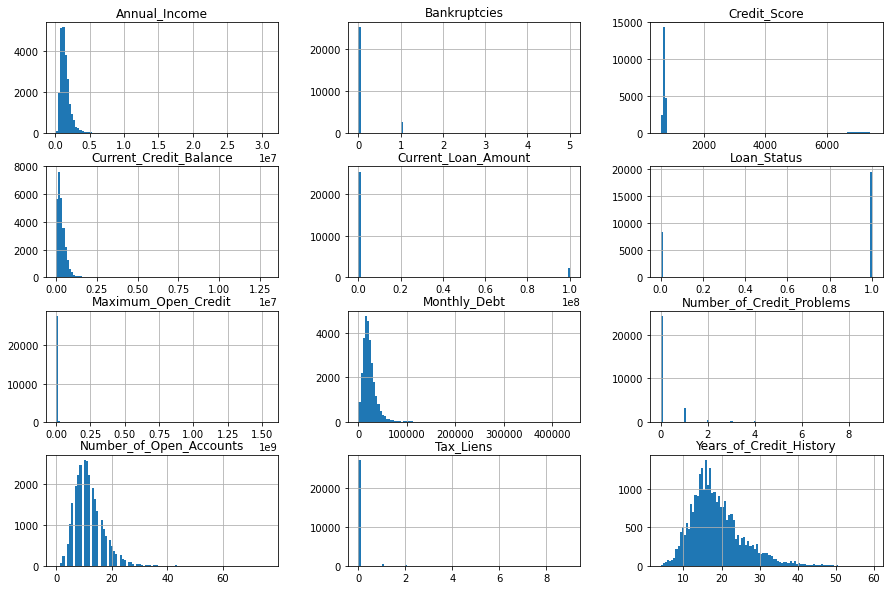

In [43]:
# Histograms for each column to see shape of distribution
Term_Long_Term.hist(bins=100, figsize=(15, 10))

Indeed, all columns have skewed distributions, so the median can be used to replace missing values again.

In [44]:
# replace missing values with median
Term_Long_Term = replace_median(Term_Long_Term)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

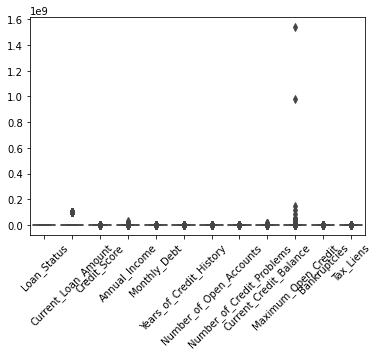

In [45]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Term_Long_Term)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [46]:
# remove outliers
Term_Long_Term = remove_outliers(Term_Long_Term)

Column  Current_Loan_Amount  had  2317 outliers removed.
Column  Credit_Score  had  2727 outliers removed.
Column  Annual_Income  had  1790 outliers removed.
Column  Monthly_Debt  had  909 outliers removed.
Column  Years_of_Credit_History  had  787 outliers removed.
Column  Number_of_Open_Accounts  had  761 outliers removed.
Column  Number_of_Credit_Problems  had  3464 outliers removed.
Column  Current_Credit_Balance  had  1240 outliers removed.
Column  Maximum_Open_Credit  had  1523 outliers removed.
Column  Bankruptcies  had  2660 outliers removed.
Column  Tax_Liens  had  516 outliers removed.


In [47]:
# normalize
Term_Long_Term = normalize(Term_Long_Term)

In [48]:
Term_Long_Term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27276 entries, 0 to 27275
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                27276 non-null  float64
 1   Current_Loan_Amount        27276 non-null  float64
 2   Credit_Score               27276 non-null  float64
 3   Annual_Income              27276 non-null  float64
 4   Monthly_Debt               27276 non-null  float64
 5   Years_of_Credit_History    27276 non-null  float64
 6   Number_of_Open_Accounts    27276 non-null  float64
 7   Number_of_Credit_Problems  27276 non-null  float64
 8   Current_Credit_Balance     27276 non-null  float64
 9   Maximum_Open_Credit        27276 non-null  float64
 10  Bankruptcies               27276 non-null  float64
 11  Tax_Liens                  27276 non-null  float64
dtypes: float64(12)
memory usage: 2.5 MB


### Years_in_current_job

#### 3. 1_year

In [49]:
# assign name to dictionary element dataframe 
Years_in_current_job_1_year = credit_subsets['Years_in_current_job_1_year'].drop(credit_subsets['Years_in_current_job_1_year'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CBC3CFF98>,
      dtype=object)

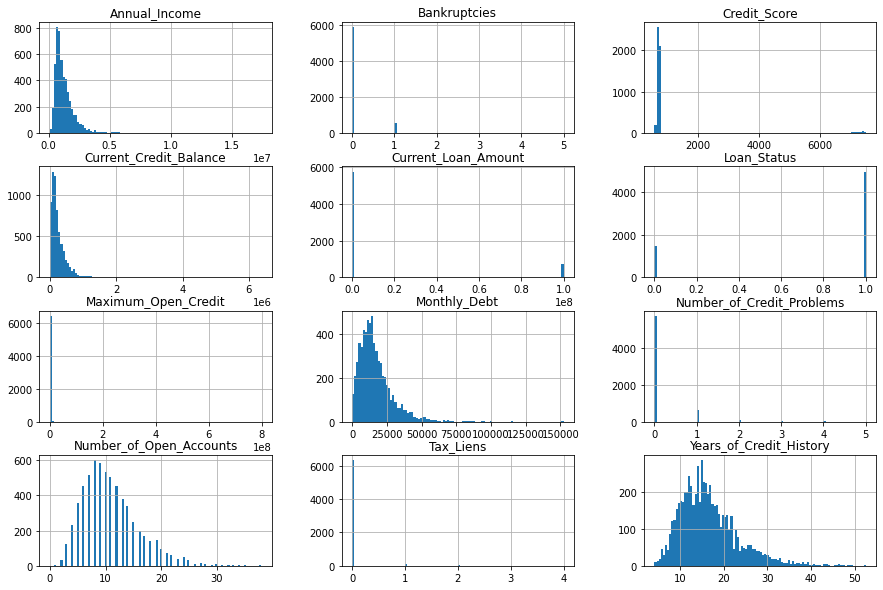

In [50]:
# Histograms for each column to see shape of distribution
Years_in_current_job_1_year.hist(bins=100, figsize=(15, 10))

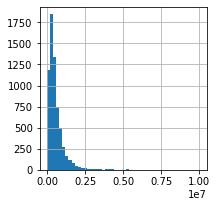

In [51]:
Years_in_current_job_1_year['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

Each distribution is skewed.

In [52]:
# replace missing values with median
Years_in_current_job_1_year = replace_median(Years_in_current_job_1_year)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

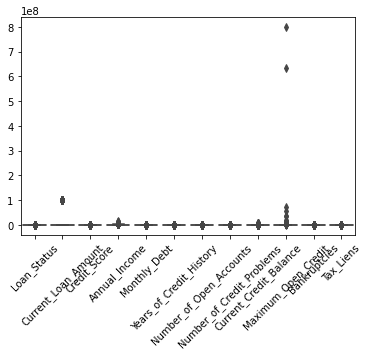

In [53]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_1_year)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [54]:
# remove outliers
remove_outliers(Years_in_current_job_1_year)

Column  Current_Loan_Amount  had  725 outliers removed.
Column  Credit_Score  had  672 outliers removed.
Column  Annual_Income  had  480 outliers removed.
Column  Monthly_Debt  had  281 outliers removed.
Column  Years_of_Credit_History  had  200 outliers removed.
Column  Number_of_Open_Accounts  had  114 outliers removed.
Column  Number_of_Credit_Problems  had  749 outliers removed.
Column  Current_Credit_Balance  had  409 outliers removed.
Column  Maximum_Open_Credit  had  390 outliers removed.
Column  Bankruptcies  had  592 outliers removed.
Column  Tax_Liens  had  116 outliers removed.


,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
26,1,99999999.0,724.0,1029857.0,13817.18,12.0,6.0,0.0,138339.0,221232.0,0.0,0.0
45,1,266112.0,750.0,919296.0,12946.79,21.6,9.0,0.0,266266.0,485518.0,0.0,0.0
76,1,389884.0,657.0,4776125.0,42985.22,21.5,14.0,1.0,237500.0,562386.0,1.0,0.0
88,0,194942.0,742.0,1212238.0,25254.99,27.4,13.0,1.0,176396.0,339834.0,1.0,0.0
107,1,541310.0,722.0,1682982.0,52733.36,17.9,13.0,0.0,356288.0,619432.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99933,1,193688.0,736.0,760380.0,3820.90,10.9,7.0,0.0,116546.0,301224.0,0.0,0.0
99954,0,316426.0,659.0,1613062.0,15189.74,21.5,25.0,2.0,242573.0,456698.0,2.0,0.0
99959,1,324742.0,704.0,623238.0,15165.42,9.0,11.0,0.0,207841.0,299706.0,0.0,0.0
99994,1,210584.0,719.0,783389.0,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0


In [55]:
# normalize
Years_in_current_job_1_year = normalize(Years_in_current_job_1_year)

In [56]:
Years_in_current_job_1_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                6460 non-null   float64
 1   Current_Loan_Amount        6460 non-null   float64
 2   Credit_Score               6460 non-null   float64
 3   Annual_Income              6460 non-null   float64
 4   Monthly_Debt               6460 non-null   float64
 5   Years_of_Credit_History    6460 non-null   float64
 6   Number_of_Open_Accounts    6460 non-null   float64
 7   Number_of_Credit_Problems  6460 non-null   float64
 8   Current_Credit_Balance     6460 non-null   float64
 9   Maximum_Open_Credit        6460 non-null   float64
 10  Bankruptcies               6460 non-null   float64
 11  Tax_Liens                  6460 non-null   float64
dtypes: float64(12)
memory usage: 605.8 KB


#### 4. 2_years

In [57]:
# assign name to dictionary element dataframe
Years_in_current_job_2_years = credit_subsets['Years_in_current_job_2_years'].drop(credit_subsets['Years_in_current_job_2_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CBD17C160>,
      dtype=object)

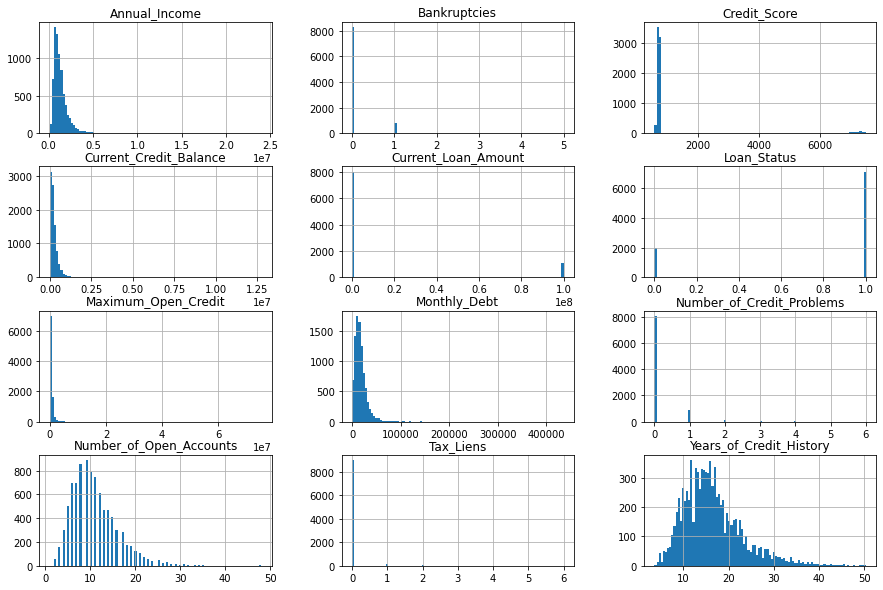

In [58]:
# Histograms for each column to see shape of distribution
Years_in_current_job_2_years.hist(bins=100, figsize=(15, 10))

Skew can be seen in all distributions.

In [59]:
# replace missing values with median
Years_in_current_job_2_years = replace_median(Years_in_current_job_2_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

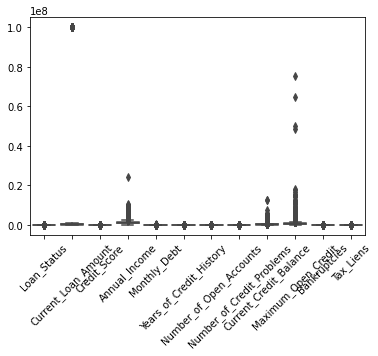

In [60]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_2_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [61]:
# remove outliers
Years_in_current_job_2_years = remove_outliers(Years_in_current_job_2_years)

Column  Current_Loan_Amount  had  1115 outliers removed.
Column  Credit_Score  had  909 outliers removed.
Column  Annual_Income  had  688 outliers removed.
Column  Monthly_Debt  had  382 outliers removed.
Column  Years_of_Credit_History  had  316 outliers removed.
Column  Number_of_Open_Accounts  had  187 outliers removed.
Column  Number_of_Credit_Problems  had  1062 outliers removed.
Column  Current_Credit_Balance  had  494 outliers removed.
Column  Maximum_Open_Credit  had  504 outliers removed.
Column  Bankruptcies  had  838 outliers removed.
Column  Tax_Liens  had  160 outliers removed.


In [62]:
# normalize
Years_in_current_job_2_years = normalize(Years_in_current_job_2_years)

In [63]:
Years_in_current_job_2_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8974 entries, 0 to 8973
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                8974 non-null   float64
 1   Current_Loan_Amount        8974 non-null   float64
 2   Credit_Score               8974 non-null   float64
 3   Annual_Income              8974 non-null   float64
 4   Monthly_Debt               8974 non-null   float64
 5   Years_of_Credit_History    8974 non-null   float64
 6   Number_of_Open_Accounts    8974 non-null   float64
 7   Number_of_Credit_Problems  8974 non-null   float64
 8   Current_Credit_Balance     8974 non-null   float64
 9   Maximum_Open_Credit        8974 non-null   float64
 10  Bankruptcies               8974 non-null   float64
 11  Tax_Liens                  8974 non-null   float64
dtypes: float64(12)
memory usage: 841.4 KB


#### 5. 3_years

In [64]:
# assign name to dictionary element dataframe
Years_in_current_job_3_years = credit_subsets['Years_in_current_job_3_years'].drop(credit_subsets['Years_in_current_job_3_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CBFCD66D8>,
      dtype=object)

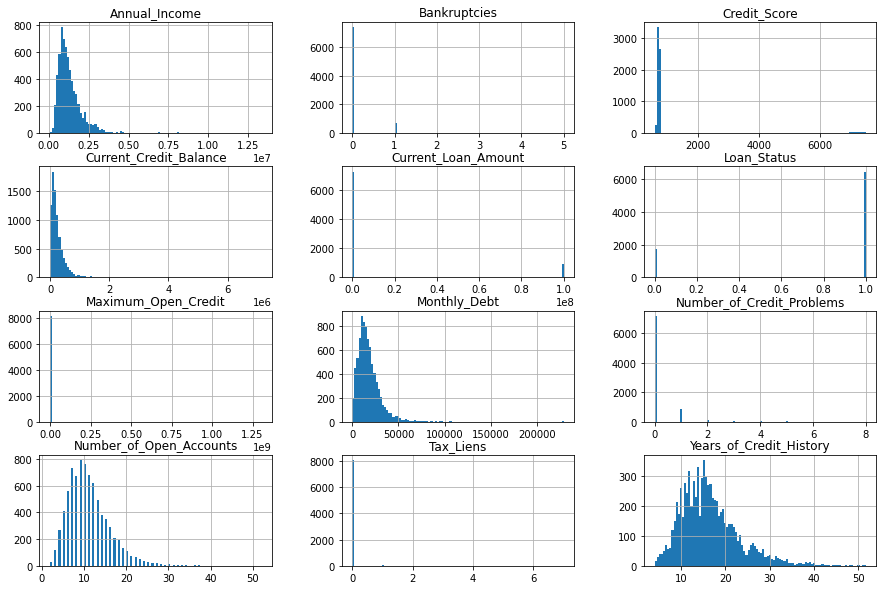

In [65]:
# Histograms for each column to see shape of distribution
Years_in_current_job_3_years.hist(bins=100, figsize=(15, 10))

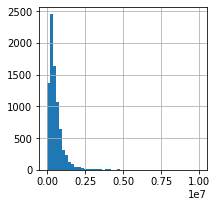

In [66]:
Years_in_current_job_3_years['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

All distributions are skewed.

In [67]:
# replace missing values with median
Years_in_current_job_3_years = replace_median(Years_in_current_job_3_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

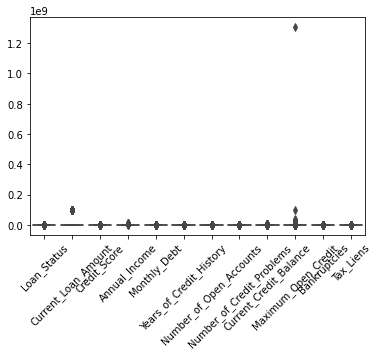

In [68]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_3_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [69]:
# remove outliers
Years_in_current_job_3_years = remove_outliers(Years_in_current_job_3_years)

Column  Current_Loan_Amount  had  947 outliers removed.
Column  Credit_Score  had  813 outliers removed.
Column  Annual_Income  had  590 outliers removed.
Column  Monthly_Debt  had  315 outliers removed.
Column  Years_of_Credit_History  had  257 outliers removed.
Column  Number_of_Open_Accounts  had  217 outliers removed.
Column  Number_of_Credit_Problems  had  990 outliers removed.
Column  Current_Credit_Balance  had  462 outliers removed.
Column  Maximum_Open_Credit  had  440 outliers removed.
Column  Bankruptcies  had  793 outliers removed.
Column  Tax_Liens  had  126 outliers removed.


In [70]:
# normalize
Years_in_current_job_3_years = normalize(Years_in_current_job_3_years)

In [71]:
Years_in_current_job_3_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8043 entries, 0 to 8042
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                8043 non-null   float64
 1   Current_Loan_Amount        8043 non-null   float64
 2   Credit_Score               8043 non-null   float64
 3   Annual_Income              8043 non-null   float64
 4   Monthly_Debt               8043 non-null   float64
 5   Years_of_Credit_History    8043 non-null   float64
 6   Number_of_Open_Accounts    8043 non-null   float64
 7   Number_of_Credit_Problems  8043 non-null   float64
 8   Current_Credit_Balance     8043 non-null   float64
 9   Maximum_Open_Credit        8043 non-null   float64
 10  Bankruptcies               8043 non-null   float64
 11  Tax_Liens                  8043 non-null   float64
dtypes: float64(12)
memory usage: 754.2 KB


#### 6. 4_years

In [72]:
# assign name to dictionary element dataframe
Years_in_current_job_4_years = credit_subsets['Years_in_current_job_4_years'].drop(credit_subsets['Years_in_current_job_4_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC1171F60>,
      dtype=object)

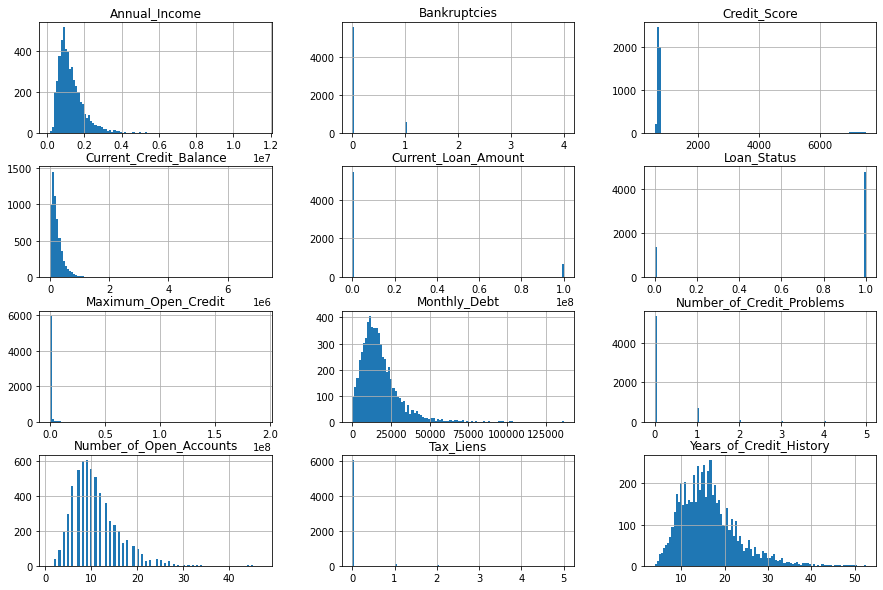

In [73]:
# Histograms for each column to see shape of distribution
Years_in_current_job_4_years.hist(bins=100, figsize=(15, 10))

All distributions have skew.

In [74]:
# replace missing values with median
Years_in_current_job_4_years = replace_median(Years_in_current_job_4_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

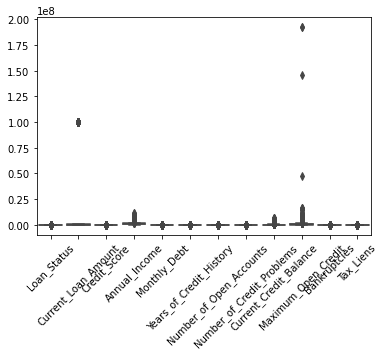

In [75]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_4_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [76]:
# remove outliers
Years_in_current_job_3_yearsYears_in_current_job_3_years = remove_outliers(Years_in_current_job_3_years)

Column  Loan_Status  had  1697 outliers removed.
Column  Current_Loan_Amount  had  931 outliers removed.
Column  Credit_Score  had  801 outliers removed.
Column  Annual_Income  had  577 outliers removed.
Column  Monthly_Debt  had  314 outliers removed.
Column  Years_of_Credit_History  had  246 outliers removed.
Column  Number_of_Open_Accounts  had  214 outliers removed.
Column  Number_of_Credit_Problems  had  864 outliers removed.
Column  Current_Credit_Balance  had  456 outliers removed.
Column  Maximum_Open_Credit  had  437 outliers removed.
Column  Bankruptcies  had  759 outliers removed.
Column  Tax_Liens  had  0 outliers removed.


In [77]:
Years_in_current_job_4_years = normalize(Years_in_current_job_4_years)

In [78]:
Years_in_current_job_4_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143 entries, 0 to 6142
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                6143 non-null   float64
 1   Current_Loan_Amount        6143 non-null   float64
 2   Credit_Score               6143 non-null   float64
 3   Annual_Income              6143 non-null   float64
 4   Monthly_Debt               6143 non-null   float64
 5   Years_of_Credit_History    6143 non-null   float64
 6   Number_of_Open_Accounts    6143 non-null   float64
 7   Number_of_Credit_Problems  6143 non-null   float64
 8   Current_Credit_Balance     6143 non-null   float64
 9   Maximum_Open_Credit        6143 non-null   float64
 10  Bankruptcies               6143 non-null   float64
 11  Tax_Liens                  6143 non-null   float64
dtypes: float64(12)
memory usage: 576.0 KB


#### 7. 5_years

In [79]:
# assign name to dictionary element dataframe
Years_in_current_job_5_years = credit_subsets['Years_in_current_job_5_years'].drop(credit_subsets['Years_in_current_job_5_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC1D82B38>,
      dtype=object)

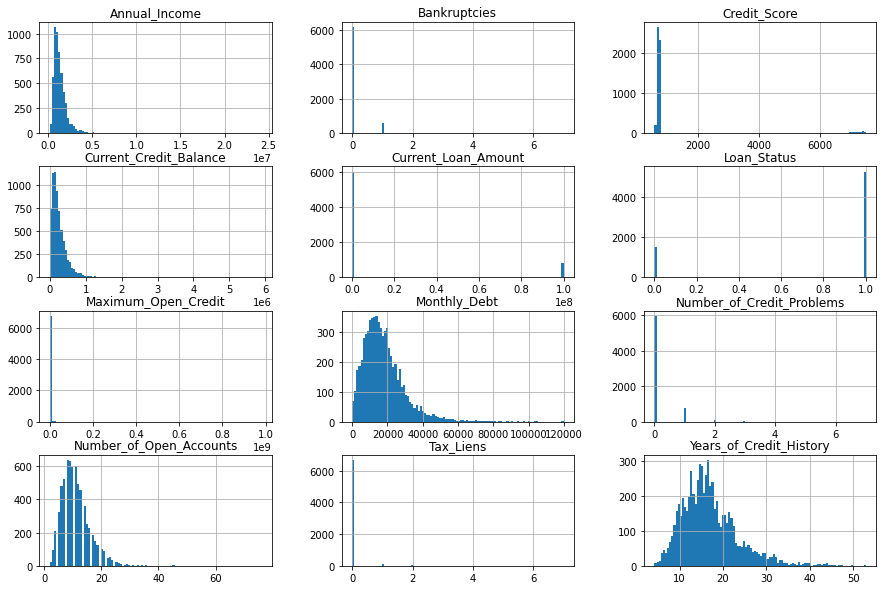

In [80]:
# Histograms for each column to see shape of distribution
Years_in_current_job_5_years.hist(bins=100, figsize=(15, 10))

Each distribution is skewed.

In [81]:
# replace missing values with median
Years_in_current_job_5_years = replace_median(Years_in_current_job_5_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

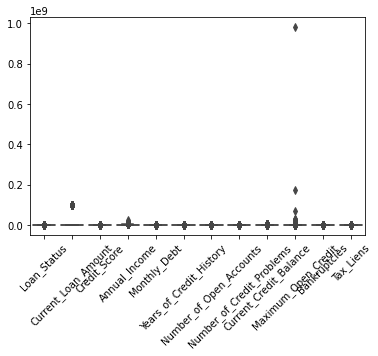

In [82]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_5_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [83]:
# remove outliers
Years_in_current_job_5_years = remove_outliers(Years_in_current_job_5_years)

Column  Current_Loan_Amount  had  797 outliers removed.
Column  Credit_Score  had  632 outliers removed.
Column  Annual_Income  had  473 outliers removed.
Column  Monthly_Debt  had  241 outliers removed.
Column  Years_of_Credit_History  had  205 outliers removed.
Column  Number_of_Open_Accounts  had  129 outliers removed.
Column  Number_of_Credit_Problems  had  840 outliers removed.
Column  Current_Credit_Balance  had  368 outliers removed.
Column  Maximum_Open_Credit  had  357 outliers removed.
Column  Bankruptcies  had  635 outliers removed.
Column  Tax_Liens  had  123 outliers removed.


In [84]:
Years_in_current_job_5_years = normalize(Years_in_current_job_5_years)

In [85]:
Years_in_current_job_5_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6664 entries, 0 to 6663
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                6664 non-null   float64
 1   Current_Loan_Amount        6664 non-null   float64
 2   Credit_Score               6664 non-null   float64
 3   Annual_Income              6664 non-null   float64
 4   Monthly_Debt               6664 non-null   float64
 5   Years_of_Credit_History    6664 non-null   float64
 6   Number_of_Open_Accounts    6664 non-null   float64
 7   Number_of_Credit_Problems  6664 non-null   float64
 8   Current_Credit_Balance     6664 non-null   float64
 9   Maximum_Open_Credit        6664 non-null   float64
 10  Bankruptcies               6664 non-null   float64
 11  Tax_Liens                  6664 non-null   float64
dtypes: float64(12)
memory usage: 624.9 KB


#### 8. 6_years

In [86]:
# assign name to dictionary element dataframe
Years_in_current_job_6_years = credit_subsets['Years_in_current_job_6_years'].drop(credit_subsets['Years_in_current_job_6_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC491CE10>,
      dtype=object)

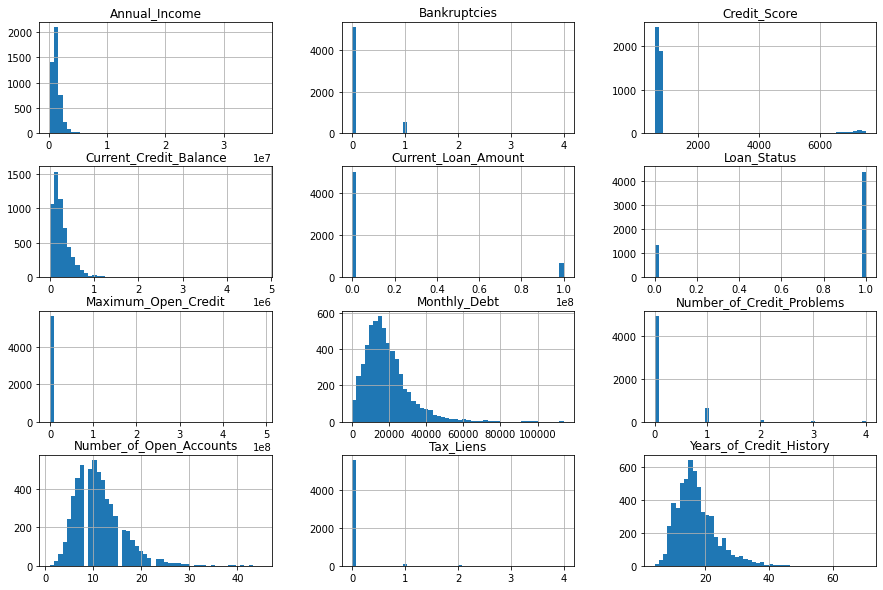

In [87]:
# Histograms for each column to see shape of distribution
Years_in_current_job_6_years.hist(bins=50, figsize=(15, 10))

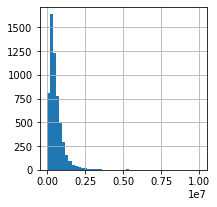

In [88]:
Years_in_current_job_6_years['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

Each distribution has skew.

In [89]:
# replace missing values with median
Years_in_current_job_6_years = replace_median(Years_in_current_job_6_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

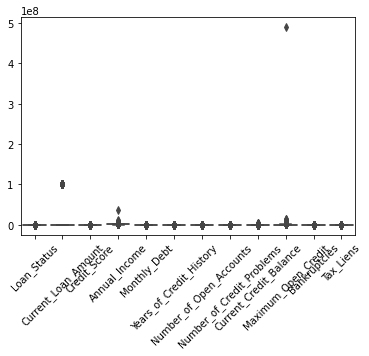

In [90]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_6_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [91]:
# remove outliers
Years_in_current_job_6_years = remove_outliers(Years_in_current_job_6_years)

Column  Current_Loan_Amount  had  672 outliers removed.
Column  Credit_Score  had  560 outliers removed.
Column  Annual_Income  had  378 outliers removed.
Column  Monthly_Debt  had  194 outliers removed.
Column  Years_of_Credit_History  had  184 outliers removed.
Column  Number_of_Open_Accounts  had  136 outliers removed.
Column  Number_of_Credit_Problems  had  746 outliers removed.
Column  Current_Credit_Balance  had  263 outliers removed.
Column  Maximum_Open_Credit  had  286 outliers removed.
Column  Bankruptcies  had  581 outliers removed.
Column  Tax_Liens  had  103 outliers removed.


In [92]:
Years_in_current_job_6_years = normalize(Years_in_current_job_6_years)

In [93]:
Years_in_current_job_6_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                5583 non-null   float64
 1   Current_Loan_Amount        5583 non-null   float64
 2   Credit_Score               5583 non-null   float64
 3   Annual_Income              5583 non-null   float64
 4   Monthly_Debt               5583 non-null   float64
 5   Years_of_Credit_History    5583 non-null   float64
 6   Number_of_Open_Accounts    5583 non-null   float64
 7   Number_of_Credit_Problems  5583 non-null   float64
 8   Current_Credit_Balance     5583 non-null   float64
 9   Maximum_Open_Credit        5583 non-null   float64
 10  Bankruptcies               5583 non-null   float64
 11  Tax_Liens                  5583 non-null   float64
dtypes: float64(12)
memory usage: 523.5 KB


#### 9. 7_years

In [94]:
# assign name to dictionary element dataframe
Years_in_current_job_7_years = credit_subsets['Years_in_current_job_7_years'].drop(credit_subsets['Years_in_current_job_7_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC57392E8>,
      dtype=object)

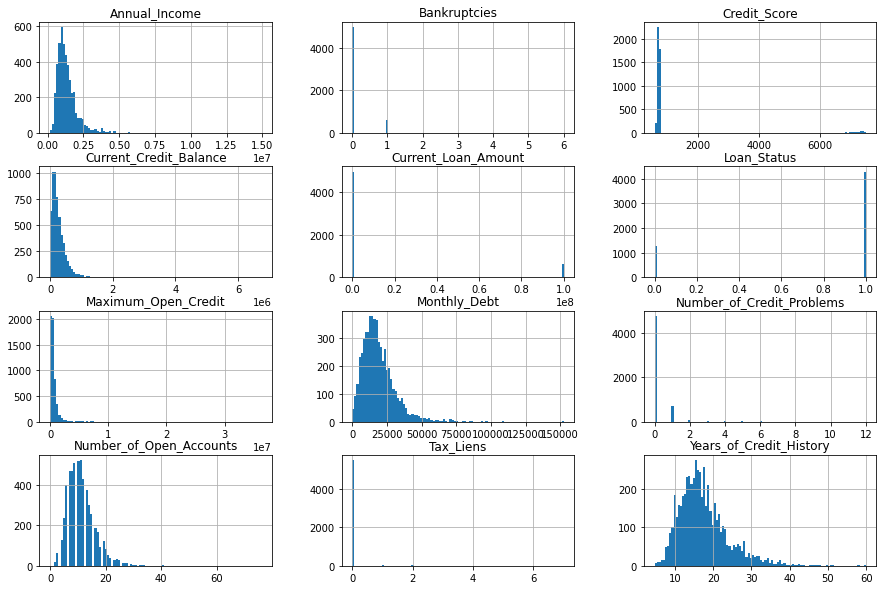

In [95]:
# Histograms for each column to see shape of distribution
Years_in_current_job_7_years.hist(bins=100, figsize=(15, 10))

Each distribution is skewed.

In [96]:
# replace missing values with median
Years_in_current_job_7_years = replace_median(Years_in_current_job_7_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

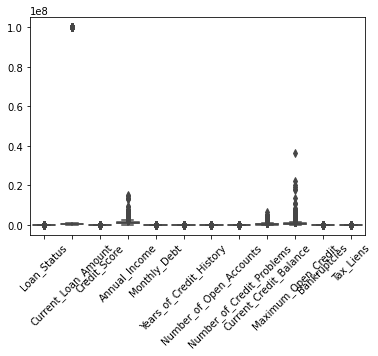

In [97]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_7_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [98]:
# remove outliers
Years_in_current_job_7_years = remove_outliers(Years_in_current_job_7_years)

Column  Current_Loan_Amount  had  618 outliers removed.
Column  Credit_Score  had  586 outliers removed.
Column  Annual_Income  had  421 outliers removed.
Column  Monthly_Debt  had  189 outliers removed.
Column  Years_of_Credit_History  had  177 outliers removed.
Column  Number_of_Open_Accounts  had  132 outliers removed.
Column  Number_of_Credit_Problems  had  797 outliers removed.
Column  Current_Credit_Balance  had  300 outliers removed.
Column  Maximum_Open_Credit  had  308 outliers removed.
Column  Bankruptcies  had  631 outliers removed.
Column  Tax_Liens  had  105 outliers removed.


In [99]:
Years_in_current_job_7_years = normalize(Years_in_current_job_7_years)

In [100]:
Years_in_current_job_7_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                5472 non-null   float64
 1   Current_Loan_Amount        5472 non-null   float64
 2   Credit_Score               5472 non-null   float64
 3   Annual_Income              5472 non-null   float64
 4   Monthly_Debt               5472 non-null   float64
 5   Years_of_Credit_History    5472 non-null   float64
 6   Number_of_Open_Accounts    5472 non-null   float64
 7   Number_of_Credit_Problems  5472 non-null   float64
 8   Current_Credit_Balance     5472 non-null   float64
 9   Maximum_Open_Credit        5472 non-null   float64
 10  Bankruptcies               5472 non-null   float64
 11  Tax_Liens                  5472 non-null   float64
dtypes: float64(12)
memory usage: 513.1 KB


#### 10. 8_years

In [101]:
# assign name to dictionary element dataframe
Years_in_current_job_8_years = credit_subsets['Years_in_current_job_8_years'].drop(credit_subsets['Years_in_current_job_8_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC5004C50>,
      dtype=object)

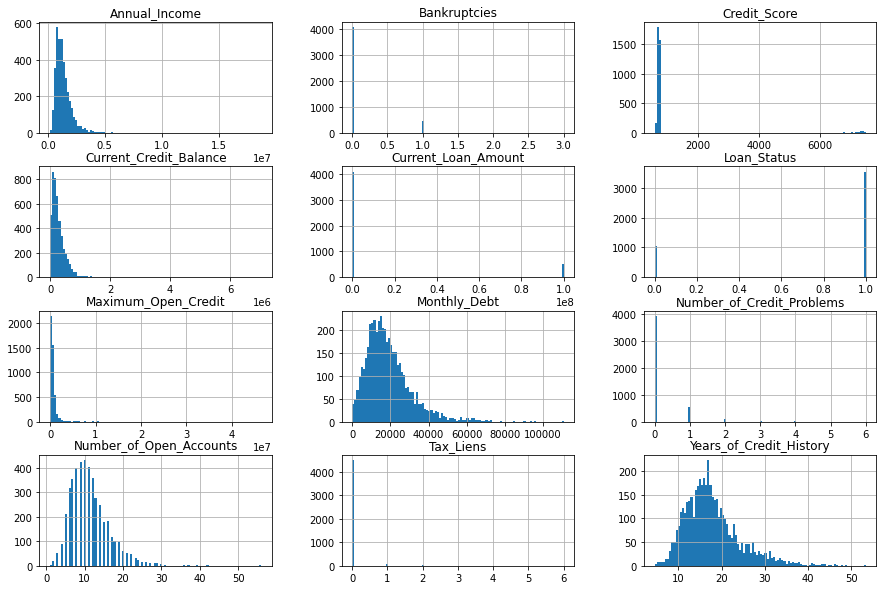

In [102]:
# Histograms for each column to see shape of distribution
Years_in_current_job_8_years.hist(bins=100, figsize=(15, 10))

It is clear from these plots that all columns have skewed distributions.

In [103]:
# replace missing values with median
Years_in_current_job_8_years = replace_median(Years_in_current_job_8_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

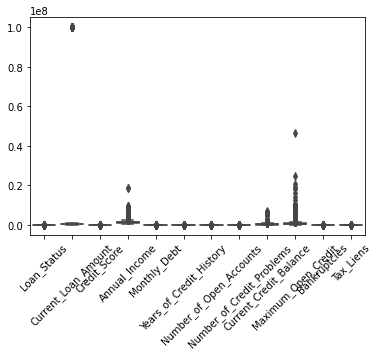

In [104]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_8_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [105]:
# remove outliers
Years_in_current_job_8_years = remove_outliers(Years_in_current_job_8_years)

Column  Current_Loan_Amount  had  507 outliers removed.
Column  Credit_Score  had  503 outliers removed.
Column  Annual_Income  had  314 outliers removed.
Column  Monthly_Debt  had  153 outliers removed.
Column  Years_of_Credit_History  had  177 outliers removed.
Column  Number_of_Open_Accounts  had  112 outliers removed.
Column  Number_of_Credit_Problems  had  661 outliers removed.
Column  Current_Credit_Balance  had  210 outliers removed.
Column  Maximum_Open_Credit  had  240 outliers removed.
Column  Bankruptcies  had  505 outliers removed.
Column  Tax_Liens  had  97 outliers removed.


In [106]:
Years_in_current_job_8_years = normalize(Years_in_current_job_8_years)

In [107]:
Years_in_current_job_8_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                4485 non-null   float64
 1   Current_Loan_Amount        4485 non-null   float64
 2   Credit_Score               4485 non-null   float64
 3   Annual_Income              4485 non-null   float64
 4   Monthly_Debt               4485 non-null   float64
 5   Years_of_Credit_History    4485 non-null   float64
 6   Number_of_Open_Accounts    4485 non-null   float64
 7   Number_of_Credit_Problems  4485 non-null   float64
 8   Current_Credit_Balance     4485 non-null   float64
 9   Maximum_Open_Credit        4485 non-null   float64
 10  Bankruptcies               4485 non-null   float64
 11  Tax_Liens                  4485 non-null   float64
dtypes: float64(12)
memory usage: 420.6 KB


#### 11. 9_years

In [108]:
# assign name to dictionary element dataframe
Years_in_current_job_9_years = credit_subsets['Years_in_current_job_9_years'].drop(credit_subsets['Years_in_current_job_9_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC91E0AC8>,
      dtype=object)

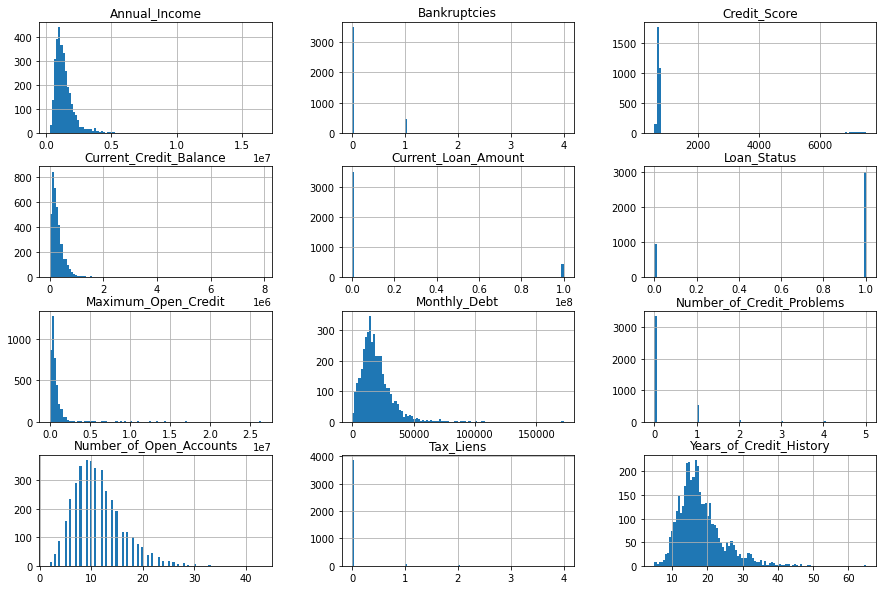

In [109]:
# Histograms for each column to see shape of distribution
Years_in_current_job_9_years.hist(bins=100, figsize=(15, 10))

In [110]:
# distributions are skewed, replace missing values with median
Years_in_current_job_9_years = replace_median(Years_in_current_job_9_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

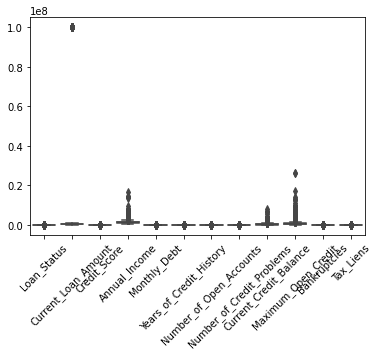

In [111]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_9_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [112]:
# remove outliers
Years_in_current_job_9_years = remove_outliers(Years_in_current_job_9_years)

Column  Current_Loan_Amount  had  449 outliers removed.
Column  Credit_Score  had  417 outliers removed.
Column  Annual_Income  had  277 outliers removed.
Column  Monthly_Debt  had  157 outliers removed.
Column  Years_of_Credit_History  had  172 outliers removed.
Column  Number_of_Open_Accounts  had  80 outliers removed.
Column  Number_of_Credit_Problems  had  597 outliers removed.
Column  Current_Credit_Balance  had  212 outliers removed.
Column  Maximum_Open_Credit  had  219 outliers removed.
Column  Bankruptcies  had  469 outliers removed.
Column  Tax_Liens  had  90 outliers removed.


In [113]:
Years_in_current_job_9_years = normalize(Years_in_current_job_9_years)

In [114]:
Years_in_current_job_9_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                3865 non-null   float64
 1   Current_Loan_Amount        3865 non-null   float64
 2   Credit_Score               3865 non-null   float64
 3   Annual_Income              3865 non-null   float64
 4   Monthly_Debt               3865 non-null   float64
 5   Years_of_Credit_History    3865 non-null   float64
 6   Number_of_Open_Accounts    3865 non-null   float64
 7   Number_of_Credit_Problems  3865 non-null   float64
 8   Current_Credit_Balance     3865 non-null   float64
 9   Maximum_Open_Credit        3865 non-null   float64
 10  Bankruptcies               3865 non-null   float64
 11  Tax_Liens                  3865 non-null   float64
dtypes: float64(12)
memory usage: 362.5 KB


#### 12. 10+_years

In [115]:
# assign name to dictionary element dataframe
Years_in_current_job_10plus_years = credit_subsets['Years_in_current_job_10+_years'].drop(credit_subsets['Years_in_current_job_10+_years'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CCB273CC0>,
      dtype=object)

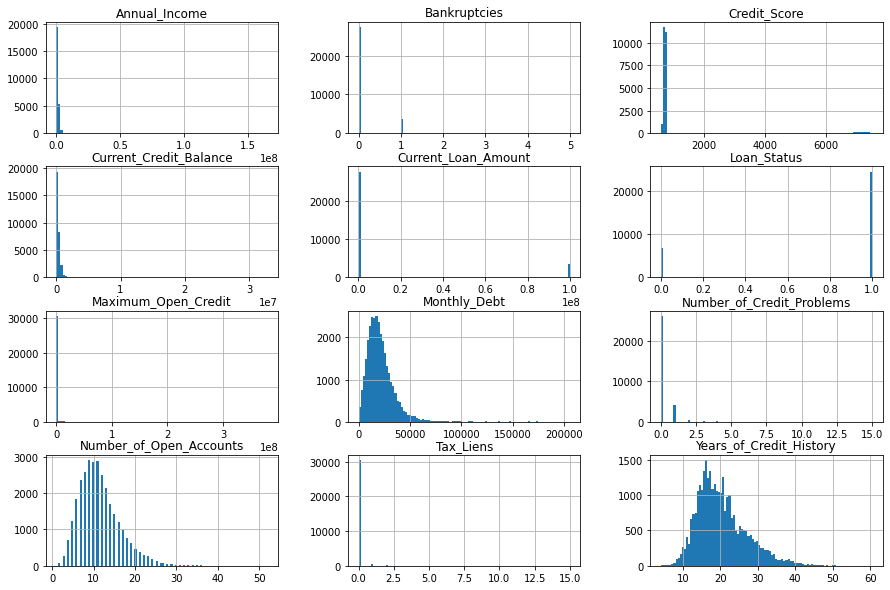

In [116]:
# Histograms for each column to see shape of distribution
Years_in_current_job_10plus_years.hist(bins=100, figsize=(15, 10))

In [117]:
# distributions are skewed, replace missing values with median
Years_in_current_job_10plus_years = replace_median(Years_in_current_job_10plus_years)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

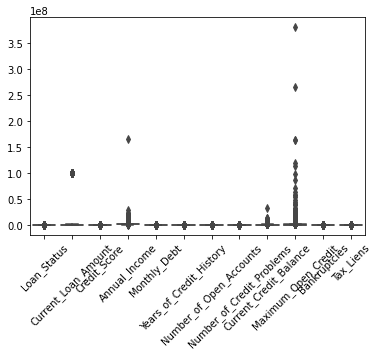

In [118]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_10plus_years)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [119]:
# remove outliers
Years_in_current_job_10plus_years = remove_outliers(Years_in_current_job_10plus_years)

Column  Current_Loan_Amount  had  3580 outliers removed.
Column  Credit_Score  had  3175 outliers removed.
Column  Annual_Income  had  2088 outliers removed.
Column  Monthly_Debt  had  963 outliers removed.
Column  Years_of_Credit_History  had  812 outliers removed.
Column  Number_of_Open_Accounts  had  726 outliers removed.
Column  Number_of_Credit_Problems  had  4824 outliers removed.
Column  Current_Credit_Balance  had  1462 outliers removed.
Column  Maximum_Open_Credit  had  1810 outliers removed.
Column  Bankruptcies  had  3825 outliers removed.
Column  Tax_Liens  had  640 outliers removed.


In [120]:
Years_in_current_job_10plus_years = normalize(Years_in_current_job_10plus_years)

In [121]:
Years_in_current_job_10plus_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30481 entries, 0 to 30480
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                30481 non-null  float64
 1   Current_Loan_Amount        30481 non-null  float64
 2   Credit_Score               30481 non-null  float64
 3   Annual_Income              30481 non-null  float64
 4   Monthly_Debt               30481 non-null  float64
 5   Years_of_Credit_History    30481 non-null  float64
 6   Number_of_Open_Accounts    30481 non-null  float64
 7   Number_of_Credit_Problems  30481 non-null  float64
 8   Current_Credit_Balance     30481 non-null  float64
 9   Maximum_Open_Credit        30481 non-null  float64
 10  Bankruptcies               30481 non-null  float64
 11  Tax_Liens                  30481 non-null  float64
dtypes: float64(12)
memory usage: 2.8 MB


#### 13. <1_year

In [122]:
# assign name to dictionary element dataframe
Years_in_current_job_less1_year = credit_subsets['Years_in_current_job_<_1_year'].drop(credit_subsets['Years_in_current_job_<_1_year'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CCCB8D550>,
      dtype=object)

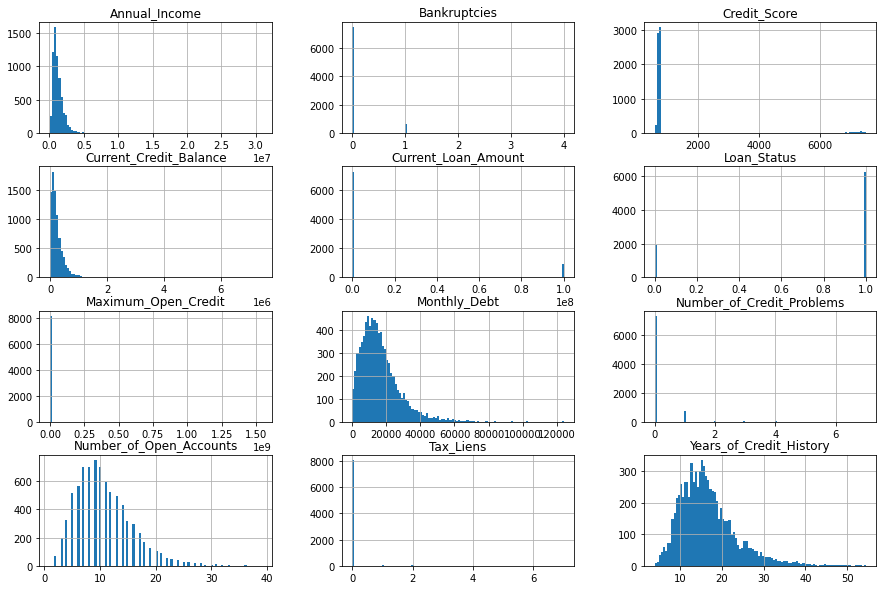

In [123]:
# Histograms for each column to see shape of distribution
Years_in_current_job_less1_year.hist(bins=100, figsize=(15, 10))

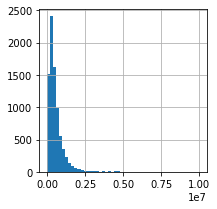

In [124]:
Years_in_current_job_less1_year['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

In [125]:
# distributions are skewed, replace missing values with median
Years_in_current_job_less1_year = replace_median(Years_in_current_job_less1_year)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

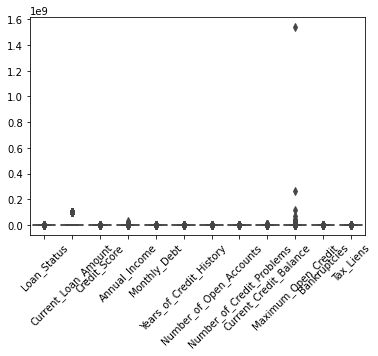

In [126]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Years_in_current_job_less1_year)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [127]:
# remove outliers
Years_in_current_job_less1_year = remove_outliers(Years_in_current_job_less1_year)

Column  Current_Loan_Amount  had  939 outliers removed.
Column  Credit_Score  had  845 outliers removed.
Column  Annual_Income  had  572 outliers removed.
Column  Monthly_Debt  had  297 outliers removed.
Column  Years_of_Credit_History  had  279 outliers removed.
Column  Number_of_Open_Accounts  had  145 outliers removed.
Column  Number_of_Credit_Problems  had  864 outliers removed.
Column  Current_Credit_Balance  had  446 outliers removed.
Column  Maximum_Open_Credit  had  497 outliers removed.
Column  Bankruptcies  had  673 outliers removed.
Column  Tax_Liens  had  115 outliers removed.


In [128]:
Years_in_current_job_less1_year = normalize(Years_in_current_job_less1_year)

In [129]:
Years_in_current_job_less1_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                8049 non-null   float64
 1   Current_Loan_Amount        8049 non-null   float64
 2   Credit_Score               8049 non-null   float64
 3   Annual_Income              8049 non-null   float64
 4   Monthly_Debt               8049 non-null   float64
 5   Years_of_Credit_History    8049 non-null   float64
 6   Number_of_Open_Accounts    8049 non-null   float64
 7   Number_of_Credit_Problems  8049 non-null   float64
 8   Current_Credit_Balance     8049 non-null   float64
 9   Maximum_Open_Credit        8049 non-null   float64
 10  Bankruptcies               8049 non-null   float64
 11  Tax_Liens                  8049 non-null   float64
dtypes: float64(12)
memory usage: 754.7 KB


### Home Ownership

#### 14. Home_Mortgage

In [130]:
# assign name to dictionary element dataframe
Home_Ownership_Home_Mortgage = credit_subsets['Home_Ownership_Home_Mortgage'].drop(credit_subsets['Home_Ownership_Home_Mortgage'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CCF0FE780>,
      dtype=object)

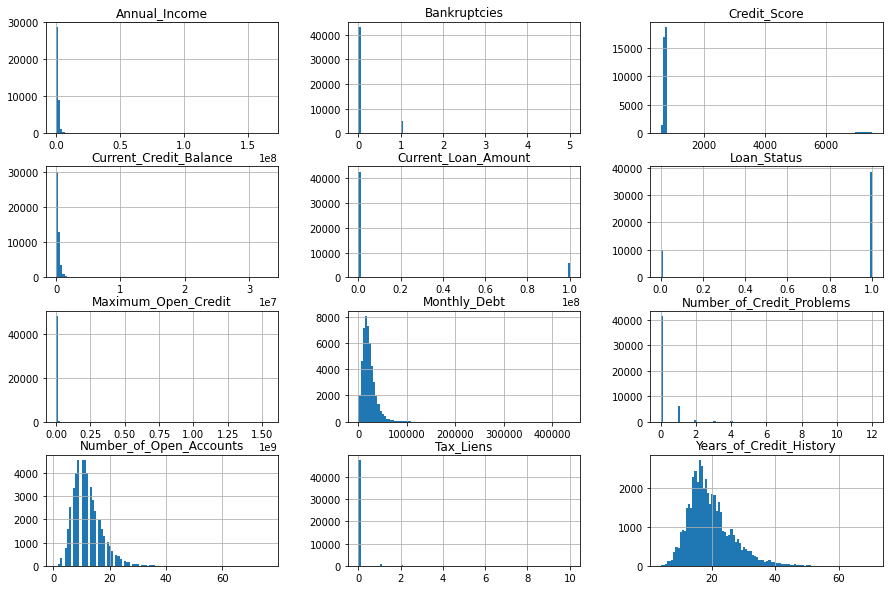

In [131]:
# Histograms for each column to see shape of distribution
Home_Ownership_Home_Mortgage.hist(bins=100, figsize=(15, 10))

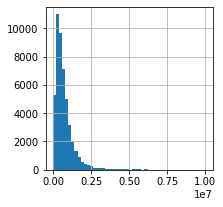

In [132]:
Home_Ownership_Home_Mortgage['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

In [133]:
# distributions are skewed, replace missing values with median
Home_Ownership_Home_Mortgage = replace_median(Home_Ownership_Home_Mortgage)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

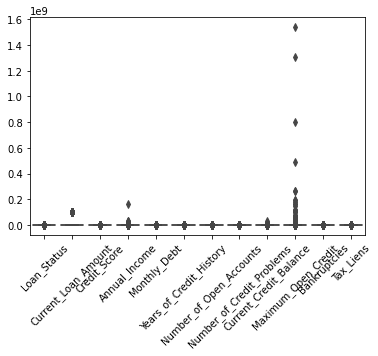

In [134]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Home_Ownership_Home_Mortgage)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [135]:
# remove outliers
Home_Ownership_Home_Mortgage = remove_outliers(Home_Ownership_Home_Mortgage)

Column  Current_Loan_Amount  had  5720 outliers removed.
Column  Credit_Score  had  4787 outliers removed.
Column  Annual_Income  had  3525 outliers removed.
Column  Monthly_Debt  had  1630 outliers removed.
Column  Years_of_Credit_History  had  1535 outliers removed.
Column  Number_of_Open_Accounts  had  1255 outliers removed.
Column  Number_of_Credit_Problems  had  6854 outliers removed.
Column  Current_Credit_Balance  had  2484 outliers removed.
Column  Maximum_Open_Credit  had  2932 outliers removed.
Column  Bankruptcies  had  5337 outliers removed.
Column  Tax_Liens  had  973 outliers removed.


In [136]:
Home_Ownership_Home_Mortgage = normalize(Home_Ownership_Home_Mortgage)

In [137]:
Home_Ownership_Home_Mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47437 entries, 0 to 47436
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                47437 non-null  float64
 1   Current_Loan_Amount        47437 non-null  float64
 2   Credit_Score               47437 non-null  float64
 3   Annual_Income              47437 non-null  float64
 4   Monthly_Debt               47437 non-null  float64
 5   Years_of_Credit_History    47437 non-null  float64
 6   Number_of_Open_Accounts    47437 non-null  float64
 7   Number_of_Credit_Problems  47437 non-null  float64
 8   Current_Credit_Balance     47437 non-null  float64
 9   Maximum_Open_Credit        47437 non-null  float64
 10  Bankruptcies               47437 non-null  float64
 11  Tax_Liens                  47437 non-null  float64
dtypes: float64(12)
memory usage: 4.3 MB


#### 15. Own_Home

In [138]:
# assign name to dictionary element dataframe
Home_Ownership_Own_Home = credit_subsets['Home_Ownership_Own_Home'].drop(credit_subsets['Home_Ownership_Own_Home'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD0606518>,
      dtype=object)

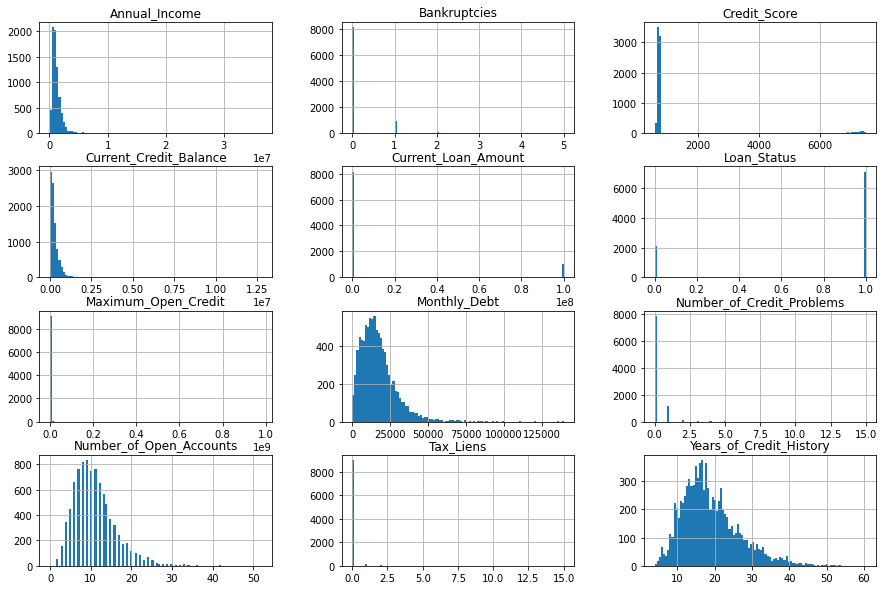

In [139]:
# Histograms for each column to see shape of distribution
Home_Ownership_Own_Home.hist(bins=100, figsize=(15, 10))

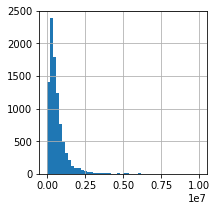

In [140]:
Home_Ownership_Own_Home['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

In [141]:
# distributions are skewed, replace missing values with median
Home_Ownership_Own_Home = replace_median(Home_Ownership_Own_Home)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

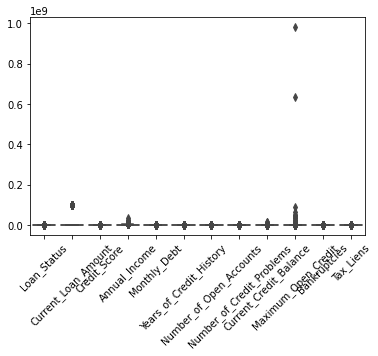

In [142]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Home_Ownership_Own_Home)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [143]:
# remove outliers
Home_Ownership_Own_Home = remove_outliers(Home_Ownership_Own_Home)

Column  Current_Loan_Amount  had  1034 outliers removed.
Column  Credit_Score  had  934 outliers removed.
Column  Annual_Income  had  634 outliers removed.
Column  Monthly_Debt  had  323 outliers removed.
Column  Years_of_Credit_History  had  255 outliers removed.
Column  Number_of_Open_Accounts  had  168 outliers removed.
Column  Number_of_Credit_Problems  had  1357 outliers removed.
Column  Current_Credit_Balance  had  531 outliers removed.
Column  Maximum_Open_Credit  had  572 outliers removed.
Column  Bankruptcies  had  1039 outliers removed.
Column  Tax_Liens  had  202 outliers removed.


In [144]:
Home_Ownership_Own_Home = normalize(Home_Ownership_Own_Home)

In [145]:
Home_Ownership_Own_Home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                8980 non-null   float64
 1   Current_Loan_Amount        8980 non-null   float64
 2   Credit_Score               8980 non-null   float64
 3   Annual_Income              8980 non-null   float64
 4   Monthly_Debt               8980 non-null   float64
 5   Years_of_Credit_History    8980 non-null   float64
 6   Number_of_Open_Accounts    8980 non-null   float64
 7   Number_of_Credit_Problems  8980 non-null   float64
 8   Current_Credit_Balance     8980 non-null   float64
 9   Maximum_Open_Credit        8980 non-null   float64
 10  Bankruptcies               8980 non-null   float64
 11  Tax_Liens                  8980 non-null   float64
dtypes: float64(12)
memory usage: 842.0 KB


#### 16. Rent

In [146]:
# assign name to dictionary element dataframe
Home_Ownership_Rent = credit_subsets['Home_Ownership_Rent'].drop(credit_subsets['Home_Ownership_Rent'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD2F04240>,
      dtype=object)

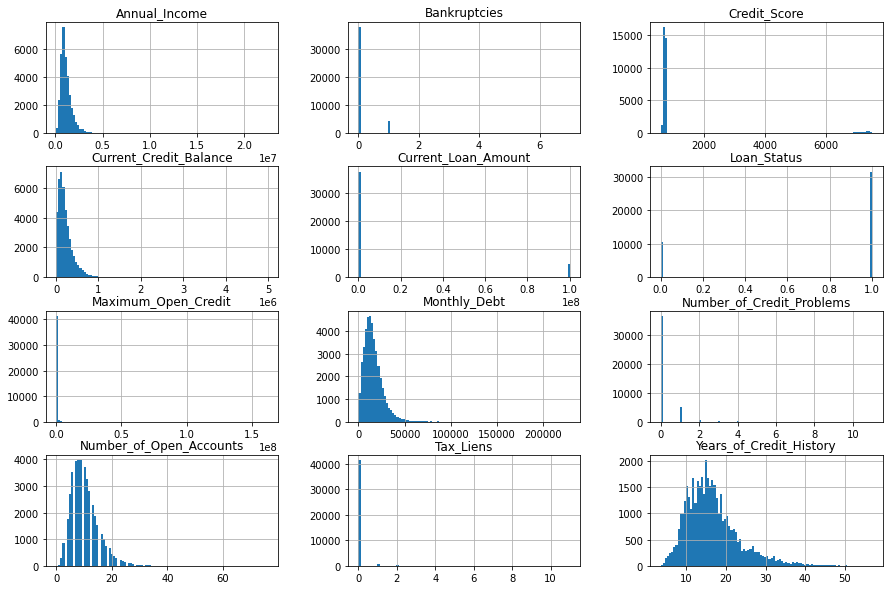

In [147]:
# Histograms for each column to see shape of distribution
Home_Ownership_Rent.hist(bins=100, figsize=(15, 10))

In [148]:
# distributions are skewed, replace missing values with median
Home_Ownership_Rent = replace_median(Home_Ownership_Rent)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

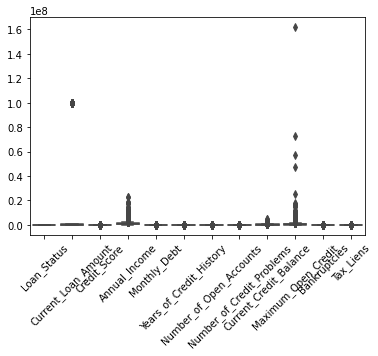

In [149]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Home_Ownership_Rent)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [150]:
# remove outliers
Home_Ownership_Rent = remove_outliers(Home_Ownership_Rent)

Column  Current_Loan_Amount  had  4701 outliers removed.
Column  Credit_Score  had  4380 outliers removed.
Column  Annual_Income  had  2749 outliers removed.
Column  Monthly_Debt  had  1358 outliers removed.
Column  Years_of_Credit_History  had  1585 outliers removed.
Column  Number_of_Open_Accounts  had  998 outliers removed.
Column  Number_of_Credit_Problems  had  5718 outliers removed.
Column  Current_Credit_Balance  had  2008 outliers removed.
Column  Maximum_Open_Credit  had  2064 outliers removed.
Column  Bankruptcies  had  4615 outliers removed.
Column  Tax_Liens  had  749 outliers removed.


In [151]:
Home_Ownership_Rent = normalize(Home_Ownership_Rent)

In [152]:
Home_Ownership_Rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                41445 non-null  float64
 1   Current_Loan_Amount        41445 non-null  float64
 2   Credit_Score               41445 non-null  float64
 3   Annual_Income              41445 non-null  float64
 4   Monthly_Debt               41445 non-null  float64
 5   Years_of_Credit_History    41445 non-null  float64
 6   Number_of_Open_Accounts    41445 non-null  float64
 7   Number_of_Credit_Problems  41445 non-null  float64
 8   Current_Credit_Balance     41445 non-null  float64
 9   Maximum_Open_Credit        41445 non-null  float64
 10  Bankruptcies               41445 non-null  float64
 11  Tax_Liens                  41445 non-null  float64
dtypes: float64(12)
memory usage: 3.8 MB


#### 17. HaveMortgage

In [153]:
# assign name to dictionary element dataframe
Home_Ownership_HaveMortgage = credit_subsets['Home_Ownership_HaveMortgage'].drop(credit_subsets['Home_Ownership_HaveMortgage'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CCDA6E9B0>,
      dtype=object)

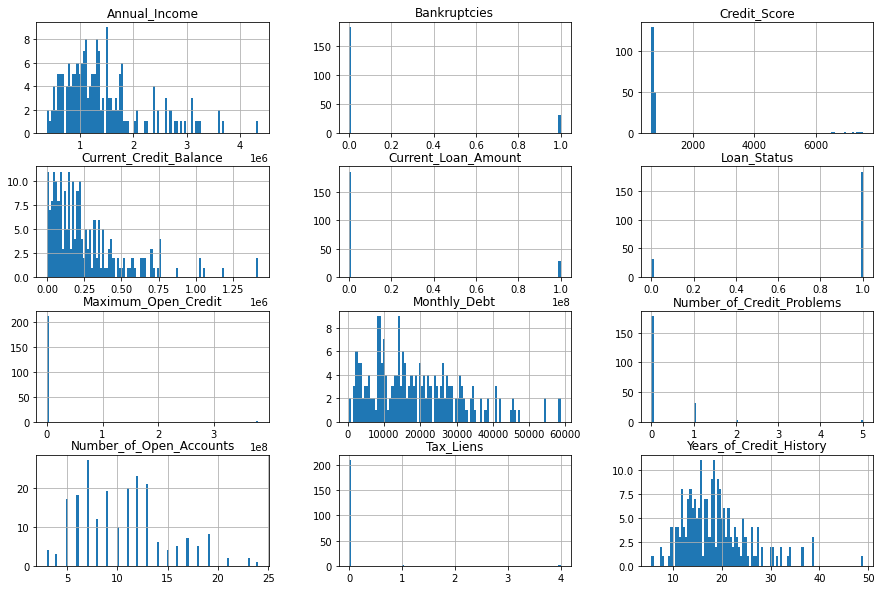

In [154]:
# Histograms for each column to see shape of distribution
Home_Ownership_HaveMortgage.hist(bins=100, figsize=(15, 10))

In [155]:
# distributions are skewed, replace missing values with median
Home_Ownership_HaveMortgage = replace_median(Home_Ownership_HaveMortgage)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

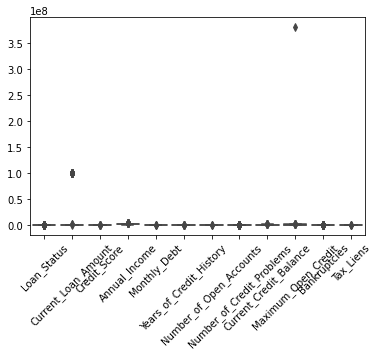

In [156]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Home_Ownership_HaveMortgage)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [157]:
# remove outliers
Home_Ownership_HaveMortgage = remove_outliers(Home_Ownership_HaveMortgage)

Column  Current_Loan_Amount  had  32 outliers removed.
Column  Credit_Score  had  8 outliers removed.
Column  Annual_Income  had  19 outliers removed.
Column  Monthly_Debt  had  4 outliers removed.
Column  Years_of_Credit_History  had  9 outliers removed.
Column  Number_of_Open_Accounts  had  3 outliers removed.
Column  Number_of_Credit_Problems  had  36 outliers removed.
Column  Current_Credit_Balance  had  11 outliers removed.
Column  Maximum_Open_Credit  had  11 outliers removed.
Column  Bankruptcies  had  31 outliers removed.
Column  Tax_Liens  had  4 outliers removed.


In [158]:
Home_Ownership_HaveMortgage = normalize(Home_Ownership_HaveMortgage)

In [159]:
Home_Ownership_HaveMortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                210 non-null    float64
 1   Current_Loan_Amount        210 non-null    float64
 2   Credit_Score               210 non-null    float64
 3   Annual_Income              210 non-null    float64
 4   Monthly_Debt               210 non-null    float64
 5   Years_of_Credit_History    210 non-null    float64
 6   Number_of_Open_Accounts    210 non-null    float64
 7   Number_of_Credit_Problems  210 non-null    float64
 8   Current_Credit_Balance     210 non-null    float64
 9   Maximum_Open_Credit        210 non-null    float64
 10  Bankruptcies               210 non-null    float64
 11  Tax_Liens                  210 non-null    float64
dtypes: float64(12)
memory usage: 19.8 KB


#### Purpose

#### 18. Home_Improvements

In [160]:
# assign name to dictionary element dataframe
Purpose_Home_Improvements = credit_subsets['Purpose_Home_Improvements'].drop(credit_subsets['Purpose_Home_Improvements'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD5AECCF8>,
      dtype=object)

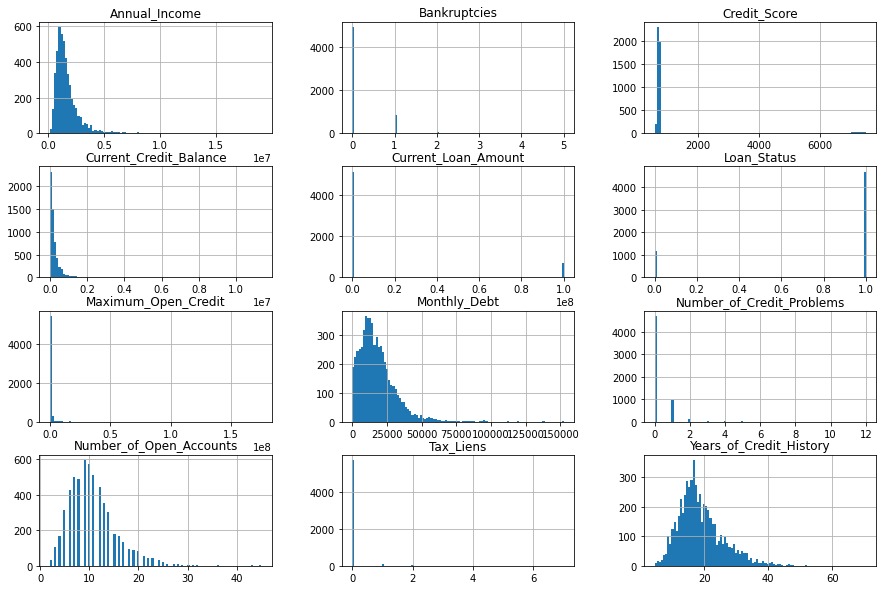

In [161]:
# Histograms for each column to see shape of distribution
Purpose_Home_Improvements.hist(bins=100, figsize=(15, 10))

In [162]:
# distributions are skewed, replace missing values with median
Purpose_Home_Improvements = replace_median(Purpose_Home_Improvements)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

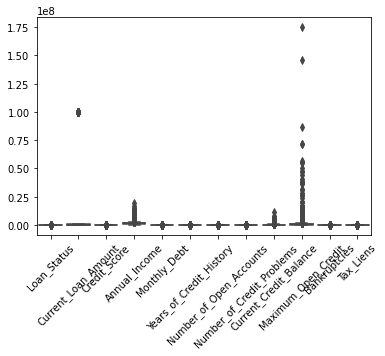

In [163]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Home_Improvements)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [164]:
# remove outliers
Purpose_Home_Improvements = remove_outliers(Purpose_Home_Improvements)

Column  Current_Loan_Amount  had  715 outliers removed.
Column  Credit_Score  had  531 outliers removed.
Column  Annual_Income  had  425 outliers removed.
Column  Monthly_Debt  had  185 outliers removed.
Column  Years_of_Credit_History  had  170 outliers removed.
Column  Number_of_Open_Accounts  had  155 outliers removed.
Column  Number_of_Credit_Problems  had  1132 outliers removed.
Column  Current_Credit_Balance  had  439 outliers removed.
Column  Maximum_Open_Credit  had  430 outliers removed.
Column  Bankruptcies  had  897 outliers removed.
Column  Tax_Liens  had  141 outliers removed.


In [165]:
Purpose_Home_Improvements = normalize(Purpose_Home_Improvements)

In [166]:
Purpose_Home_Improvements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                5698 non-null   float64
 1   Current_Loan_Amount        5698 non-null   float64
 2   Credit_Score               5698 non-null   float64
 3   Annual_Income              5698 non-null   float64
 4   Monthly_Debt               5698 non-null   float64
 5   Years_of_Credit_History    5698 non-null   float64
 6   Number_of_Open_Accounts    5698 non-null   float64
 7   Number_of_Credit_Problems  5698 non-null   float64
 8   Current_Credit_Balance     5698 non-null   float64
 9   Maximum_Open_Credit        5698 non-null   float64
 10  Bankruptcies               5698 non-null   float64
 11  Tax_Liens                  5698 non-null   float64
dtypes: float64(12)
memory usage: 534.3 KB


#### 19. Debt_Consolidation

In [167]:
# assign name to dictionary element dataframe
Purpose_Debt_Consolidation = credit_subsets['Purpose_Debt_Consolidation'].drop(credit_subsets['Purpose_Debt_Consolidation'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CCD8BD978>,
      dtype=object)

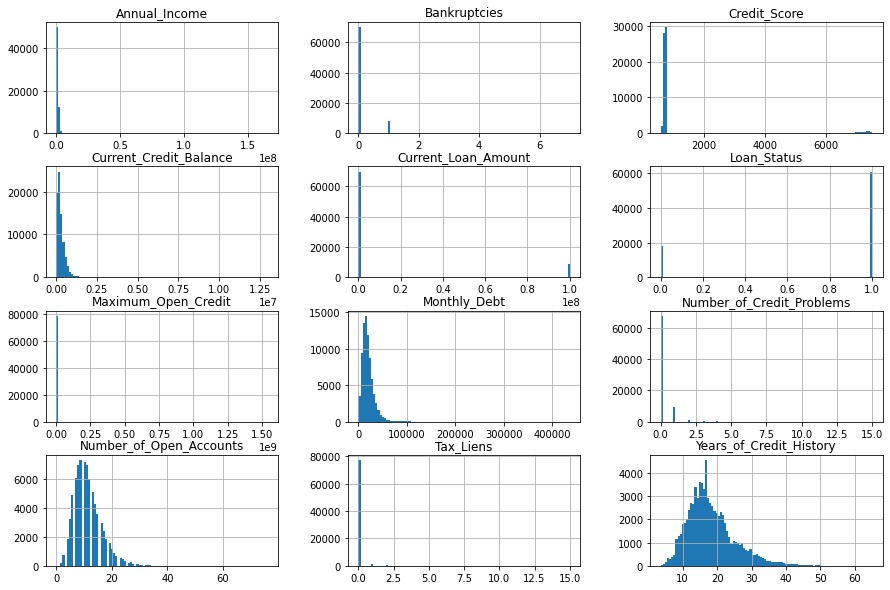

In [168]:
# Histograms for each column to see shape of distribution
Purpose_Debt_Consolidation.hist(bins=100, figsize=(15, 10))

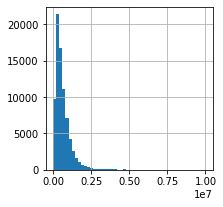

In [169]:
Purpose_Debt_Consolidation['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

In [170]:
# distributions are skewed, replace missing values with median
Purpose_Debt_Consolidation = replace_median(Purpose_Debt_Consolidation)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

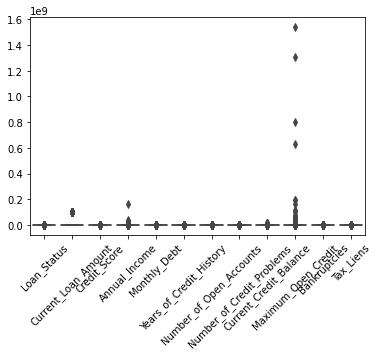

In [171]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Debt_Consolidation)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [172]:
# remove outliers
Purpose_Debt_Consolidation = remove_outliers(Purpose_Debt_Consolidation)

Column  Current_Loan_Amount  had  9046 outliers removed.
Column  Credit_Score  had  8497 outliers removed.
Column  Annual_Income  had  5180 outliers removed.
Column  Monthly_Debt  had  2636 outliers removed.
Column  Years_of_Credit_History  had  2397 outliers removed.
Column  Number_of_Open_Accounts  had  1913 outliers removed.
Column  Number_of_Credit_Problems  had  10817 outliers removed.
Column  Current_Credit_Balance  had  3794 outliers removed.
Column  Maximum_Open_Credit  had  4351 outliers removed.
Column  Bankruptcies  had  8634 outliers removed.
Column  Tax_Liens  had  1462 outliers removed.


In [173]:
Purpose_Debt_Consolidation = normalize(Purpose_Debt_Consolidation)

In [174]:
Purpose_Debt_Consolidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77090 entries, 0 to 77089
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                77090 non-null  float64
 1   Current_Loan_Amount        77090 non-null  float64
 2   Credit_Score               77090 non-null  float64
 3   Annual_Income              77090 non-null  float64
 4   Monthly_Debt               77090 non-null  float64
 5   Years_of_Credit_History    77090 non-null  float64
 6   Number_of_Open_Accounts    77090 non-null  float64
 7   Number_of_Credit_Problems  77090 non-null  float64
 8   Current_Credit_Balance     77090 non-null  float64
 9   Maximum_Open_Credit        77090 non-null  float64
 10  Bankruptcies               77090 non-null  float64
 11  Tax_Liens                  77090 non-null  float64
dtypes: float64(12)
memory usage: 7.1 MB


#### 20. Buy_House

In [175]:
# assign name to dictionary element dataframe
Purpose_Buy_House = credit_subsets['Purpose_Buy_House'].drop(credit_subsets['Purpose_Buy_House'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0360D550>,
      dtype=object)

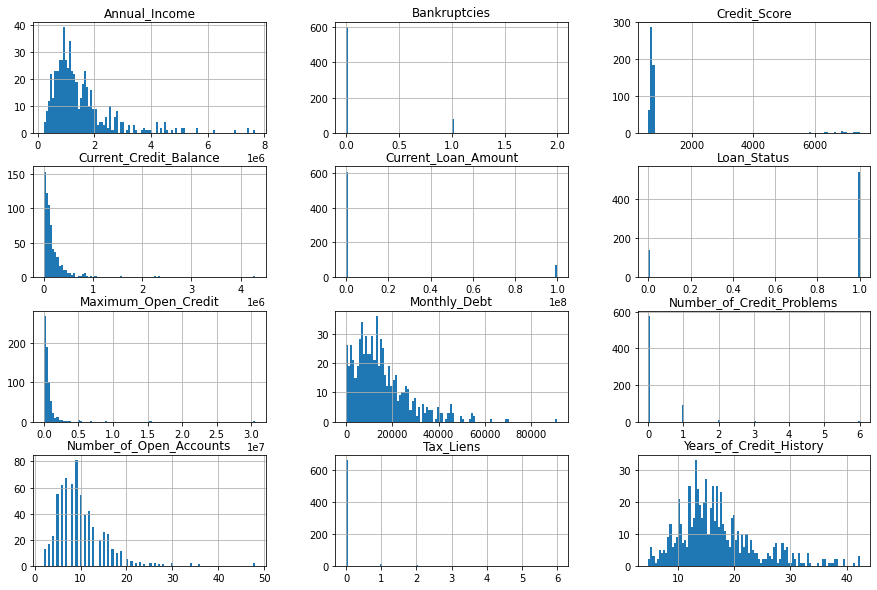

In [176]:
# Histograms for each column to see shape of distribution
Purpose_Buy_House.hist(bins=100, figsize=(15, 10))

In [177]:
# distributions are skewed, replace missing values with median
Purpose_Buy_Hous = replace_median(Purpose_Buy_House)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

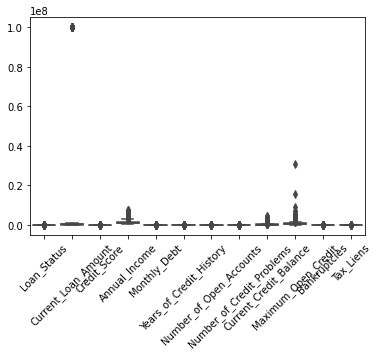

In [178]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Buy_House)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [179]:
# remove outliers
Purpose_Buy_Hous = remove_outliers(Purpose_Buy_House)

Column  Current_Loan_Amount  had  73 outliers removed.
Column  Credit_Score  had  62 outliers removed.
Column  Annual_Income  had  55 outliers removed.
Column  Monthly_Debt  had  29 outliers removed.
Column  Years_of_Credit_History  had  31 outliers removed.
Column  Number_of_Open_Accounts  had  23 outliers removed.
Column  Number_of_Credit_Problems  had  100 outliers removed.
Column  Current_Credit_Balance  had  51 outliers removed.
Column  Maximum_Open_Credit  had  45 outliers removed.
Column  Bankruptcies  had  81 outliers removed.
Column  Tax_Liens  had  17 outliers removed.


In [180]:
Purpose_Buy_House = normalize(Purpose_Buy_Hous)

In [181]:
Purpose_Buy_House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                661 non-null    float64
 1   Current_Loan_Amount        661 non-null    float64
 2   Credit_Score               661 non-null    float64
 3   Annual_Income              661 non-null    float64
 4   Monthly_Debt               661 non-null    float64
 5   Years_of_Credit_History    661 non-null    float64
 6   Number_of_Open_Accounts    661 non-null    float64
 7   Number_of_Credit_Problems  661 non-null    float64
 8   Current_Credit_Balance     661 non-null    float64
 9   Maximum_Open_Credit        661 non-null    float64
 10  Bankruptcies               661 non-null    float64
 11  Tax_Liens                  661 non-null    float64
dtypes: float64(12)
memory usage: 62.1 KB


#### 21. other

In [182]:
# assign name to dictionary element dataframe
Purpose_other = credit_subsets['Purpose_other'].drop(credit_subsets['Purpose_other'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0471DB00>,
      dtype=object)

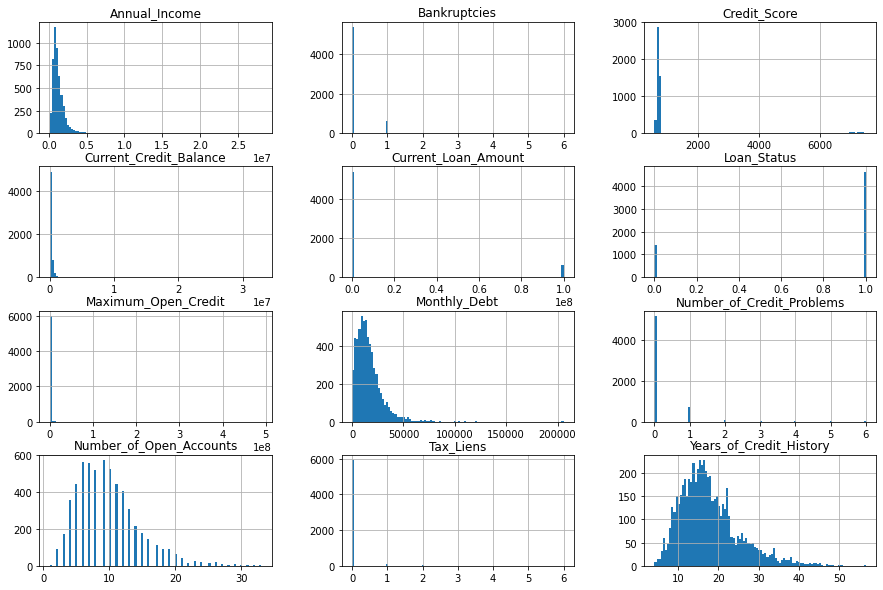

In [183]:
# Histograms for each column to see shape of distribution
Purpose_other.hist(bins=100, figsize=(15, 10))

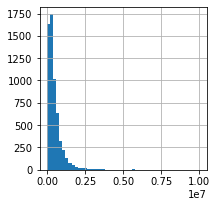

In [184]:
Purpose_other['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

In [185]:
# distributions are skewed, replace missing values with median
Purpose_other = replace_median(Purpose_other)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

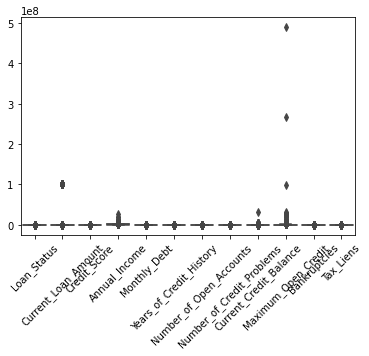

In [186]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_other)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [187]:
# remove outliers
Purpose_other = remove_outliers(Purpose_other)

Column  Current_Loan_Amount  had  722 outliers removed.
Column  Credit_Score  had  595 outliers removed.
Column  Annual_Income  had  383 outliers removed.
Column  Monthly_Debt  had  235 outliers removed.
Column  Years_of_Credit_History  had  183 outliers removed.
Column  Number_of_Open_Accounts  had  145 outliers removed.
Column  Number_of_Credit_Problems  had  844 outliers removed.
Column  Current_Credit_Balance  had  465 outliers removed.
Column  Maximum_Open_Credit  had  396 outliers removed.
Column  Bankruptcies  had  638 outliers removed.
Column  Tax_Liens  had  123 outliers removed.


In [188]:
Purpose_other = normalize(Purpose_other)

In [189]:
Purpose_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                5914 non-null   float64
 1   Current_Loan_Amount        5914 non-null   float64
 2   Credit_Score               5914 non-null   float64
 3   Annual_Income              5914 non-null   float64
 4   Monthly_Debt               5914 non-null   float64
 5   Years_of_Credit_History    5914 non-null   float64
 6   Number_of_Open_Accounts    5914 non-null   float64
 7   Number_of_Credit_Problems  5914 non-null   float64
 8   Current_Credit_Balance     5914 non-null   float64
 9   Maximum_Open_Credit        5914 non-null   float64
 10  Bankruptcies               5914 non-null   float64
 11  Tax_Liens                  5914 non-null   float64
dtypes: float64(12)
memory usage: 554.6 KB


#### 22. Business_Loan

In [190]:
# assign name to dictionary element dataframe
Purpose_Business_Loan = credit_subsets['Purpose_Business_Loan'].drop(credit_subsets['Purpose_Business_Loan'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D029922E8>,
      dtype=object)

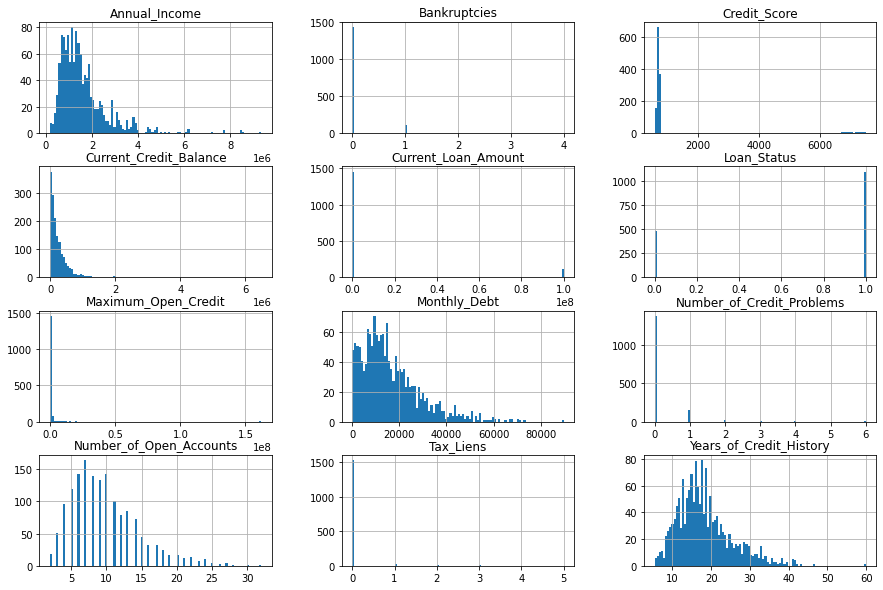

In [191]:
# Histograms for each column to see shape of distribution
Purpose_Business_Loan.hist(bins=100, figsize=(15, 10))

In [192]:
# distributions are skewed, replace missing values with median
Purpose_Business_Loan = replace_median(Purpose_Business_Loan)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

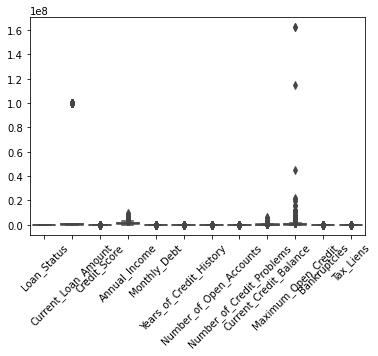

In [193]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Business_Loan)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [194]:
# remove outliers
Purpose_Business_Loan = remove_outliers(Purpose_Business_Loan)

Column  Current_Loan_Amount  had  118 outliers removed.
Column  Credit_Score  had  192 outliers removed.
Column  Annual_Income  had  115 outliers removed.
Column  Monthly_Debt  had  61 outliers removed.
Column  Years_of_Credit_History  had  49 outliers removed.
Column  Number_of_Open_Accounts  had  48 outliers removed.
Column  Number_of_Credit_Problems  had  184 outliers removed.
Column  Current_Credit_Balance  had  100 outliers removed.
Column  Maximum_Open_Credit  had  104 outliers removed.
Column  Bankruptcies  had  124 outliers removed.
Column  Tax_Liens  had  40 outliers removed.


In [195]:
Purpose_Business_Loan = normalize(Purpose_Business_Loan)

In [196]:
Purpose_Business_Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                1529 non-null   float64
 1   Current_Loan_Amount        1529 non-null   float64
 2   Credit_Score               1529 non-null   float64
 3   Annual_Income              1529 non-null   float64
 4   Monthly_Debt               1529 non-null   float64
 5   Years_of_Credit_History    1529 non-null   float64
 6   Number_of_Open_Accounts    1529 non-null   float64
 7   Number_of_Credit_Problems  1529 non-null   float64
 8   Current_Credit_Balance     1529 non-null   float64
 9   Maximum_Open_Credit        1529 non-null   float64
 10  Bankruptcies               1529 non-null   float64
 11  Tax_Liens                  1529 non-null   float64
dtypes: float64(12)
memory usage: 143.5 KB


#### 23. Buy_a_Car

In [197]:
# assign name to dictionary element dataframe
Purpose_Buy_a_Car = credit_subsets['Purpose_Buy_a_Car'].drop(credit_subsets['Purpose_Buy_a_Car'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D07F7CA90>,
      dtype=object)

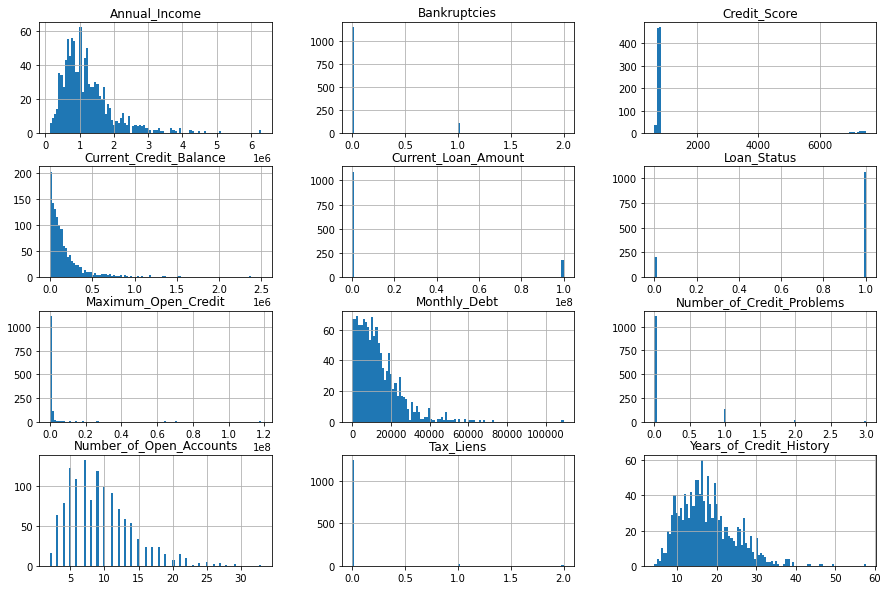

In [198]:
# Histograms for each column to see shape of distribution
Purpose_Buy_a_Car.hist(bins=100, figsize=(15, 10))

In [199]:
# distributions are skewed, replace missing values with median
Purpose_Buy_a_Car = replace_median(Purpose_Buy_a_Car)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

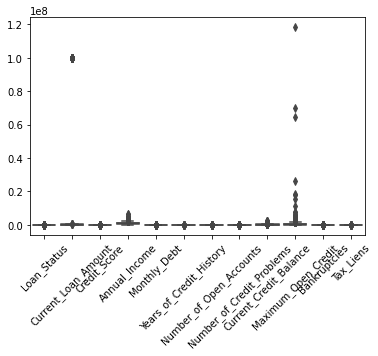

In [200]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Buy_a_Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [201]:
# remove outliers
Purpose_Buy_a_Car = remove_outliers(Purpose_Buy_a_Car)

Column  Current_Loan_Amount  had  186 outliers removed.
Column  Credit_Score  had  109 outliers removed.
Column  Annual_Income  had  84 outliers removed.
Column  Monthly_Debt  had  45 outliers removed.
Column  Years_of_Credit_History  had  18 outliers removed.
Column  Number_of_Open_Accounts  had  29 outliers removed.
Column  Number_of_Credit_Problems  had  153 outliers removed.
Column  Current_Credit_Balance  had  106 outliers removed.
Column  Maximum_Open_Credit  had  101 outliers removed.
Column  Bankruptcies  had  117 outliers removed.
Column  Tax_Liens  had  22 outliers removed.


In [202]:
Purpose_Buy_a_Car = normalize(Purpose_Buy_a_Car)

In [203]:
Purpose_Buy_a_Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                1243 non-null   float64
 1   Current_Loan_Amount        1243 non-null   float64
 2   Credit_Score               1243 non-null   float64
 3   Annual_Income              1243 non-null   float64
 4   Monthly_Debt               1243 non-null   float64
 5   Years_of_Credit_History    1243 non-null   float64
 6   Number_of_Open_Accounts    1243 non-null   float64
 7   Number_of_Credit_Problems  1243 non-null   float64
 8   Current_Credit_Balance     1243 non-null   float64
 9   Maximum_Open_Credit        1243 non-null   float64
 10  Bankruptcies               1243 non-null   float64
 11  Tax_Liens                  1243 non-null   float64
dtypes: float64(12)
memory usage: 116.7 KB


#### 24. major_purchase

In [204]:
# assign name to dictionary element dataframe
Purpose_major_purchase = credit_subsets['Purpose_major_purchase'].drop(credit_subsets['Purpose_major_purchase'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC2143668>,
      dtype=object)

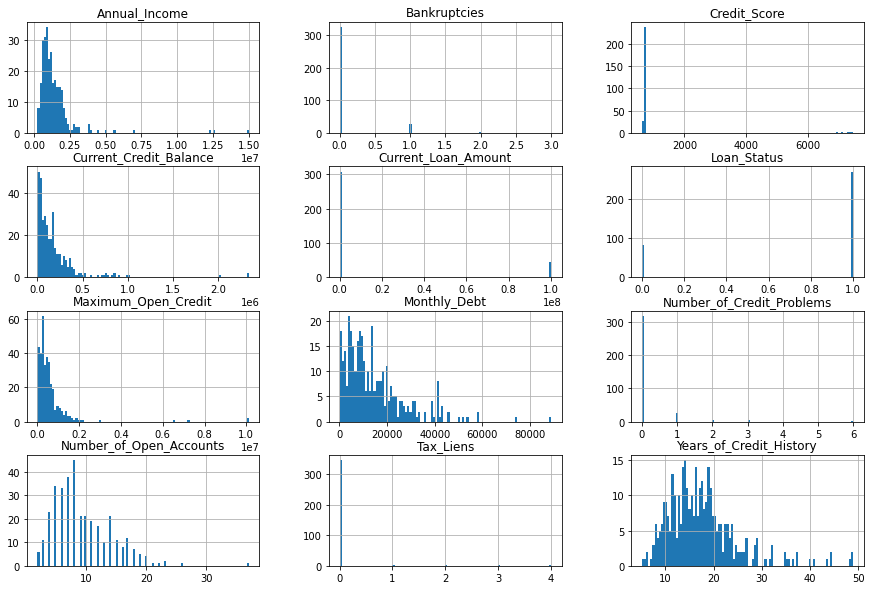

In [205]:
# Histograms for each column to see shape of distribution
Purpose_major_purchase.hist(bins=100, figsize=(15, 10))

In [206]:
# distributions are skewed, replace missing values with median
Purpose_major_purchase = replace_median(Purpose_major_purchase)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

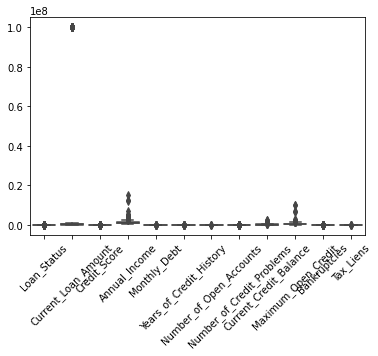

In [207]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_major_purchase)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [208]:
# remove outliers
Purpose_major_purchase = remove_outliers(Purpose_major_purchase)

Column  Current_Loan_Amount  had  45 outliers removed.
Column  Credit_Score  had  36 outliers removed.
Column  Annual_Income  had  20 outliers removed.
Column  Monthly_Debt  had  15 outliers removed.
Column  Years_of_Credit_History  had  18 outliers removed.
Column  Number_of_Open_Accounts  had  5 outliers removed.
Column  Number_of_Credit_Problems  had  35 outliers removed.
Column  Current_Credit_Balance  had  21 outliers removed.
Column  Maximum_Open_Credit  had  24 outliers removed.
Column  Bankruptcies  had  30 outliers removed.
Column  Tax_Liens  had  7 outliers removed.


In [209]:
Purpose_major_purchase = normalize(Purpose_major_purchase)

In [210]:
Purpose_major_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                345 non-null    float64
 1   Current_Loan_Amount        345 non-null    float64
 2   Credit_Score               345 non-null    float64
 3   Annual_Income              345 non-null    float64
 4   Monthly_Debt               345 non-null    float64
 5   Years_of_Credit_History    345 non-null    float64
 6   Number_of_Open_Accounts    345 non-null    float64
 7   Number_of_Credit_Problems  345 non-null    float64
 8   Current_Credit_Balance     345 non-null    float64
 9   Maximum_Open_Credit        345 non-null    float64
 10  Bankruptcies               345 non-null    float64
 11  Tax_Liens                  345 non-null    float64
dtypes: float64(12)
memory usage: 32.5 KB


#### 25. Take_a_Trip

In [211]:
# assign name to dictionary element dataframe
Purpose_Take_a_Trip = credit_subsets['Purpose_Take_a_Trip'].drop(credit_subsets['Purpose_Take_a_Trip'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0AE7F4A8>,
      dtype=object)

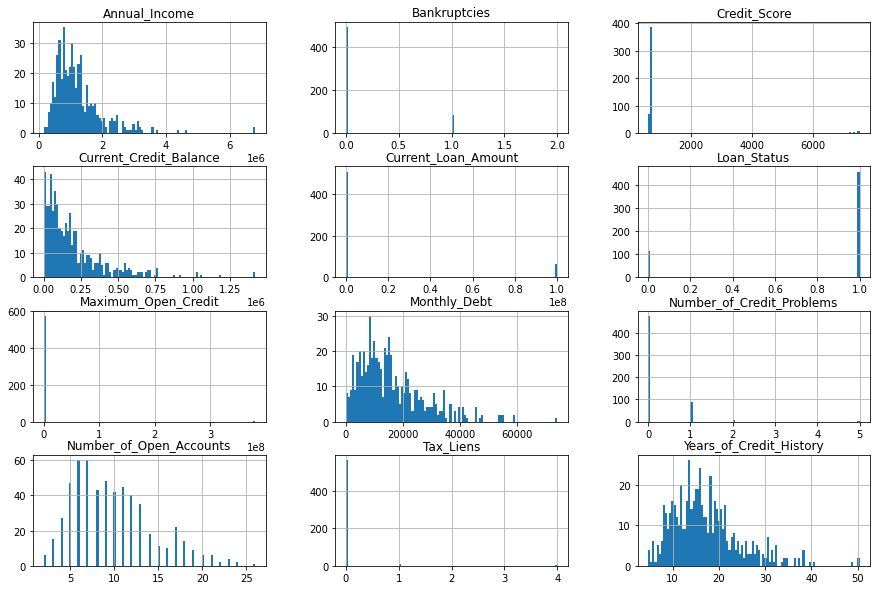

In [212]:
# Histograms for each column to see shape of distribution
Purpose_Take_a_Trip.hist(bins=100, figsize=(15, 10))

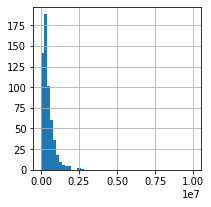

In [213]:
Purpose_Take_a_Trip['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

In [214]:
# distributions are skewed, replace missing values with median
Purpose_Take_a_Trip = replace_median(Purpose_Take_a_Trip)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

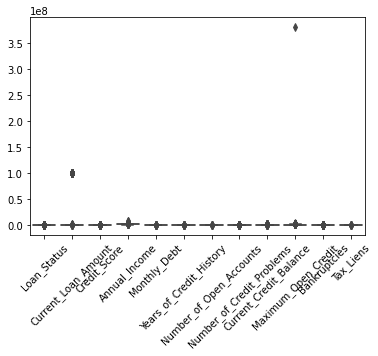

In [215]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Take_a_Trip)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [216]:
# remove outliers
Purpose_Take_a_Trip = remove_outliers(Purpose_Take_a_Trip)

Column  Current_Loan_Amount  had  76 outliers removed.
Column  Credit_Score  had  41 outliers removed.
Column  Annual_Income  had  46 outliers removed.
Column  Monthly_Debt  had  19 outliers removed.
Column  Years_of_Credit_History  had  18 outliers removed.
Column  Number_of_Open_Accounts  had  9 outliers removed.
Column  Number_of_Credit_Problems  had  97 outliers removed.
Column  Current_Credit_Balance  had  37 outliers removed.
Column  Maximum_Open_Credit  had  30 outliers removed.
Column  Bankruptcies  had  84 outliers removed.
Column  Tax_Liens  had  10 outliers removed.


In [217]:
Purpose_Take_a_Trip = normalize(Purpose_Take_a_Trip)

In [218]:
Purpose_Take_a_Trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                563 non-null    float64
 1   Current_Loan_Amount        563 non-null    float64
 2   Credit_Score               563 non-null    float64
 3   Annual_Income              563 non-null    float64
 4   Monthly_Debt               563 non-null    float64
 5   Years_of_Credit_History    563 non-null    float64
 6   Number_of_Open_Accounts    563 non-null    float64
 7   Number_of_Credit_Problems  563 non-null    float64
 8   Current_Credit_Balance     563 non-null    float64
 9   Maximum_Open_Credit        563 non-null    float64
 10  Bankruptcies               563 non-null    float64
 11  Tax_Liens                  563 non-null    float64
dtypes: float64(12)
memory usage: 52.9 KB


#### 26. Other

In [219]:
# assign name to dictionary element dataframe
Purpose_Other = credit_subsets['Purpose_Other'].drop(credit_subsets['Purpose_Other'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0C839EB8>,
      dtype=object)

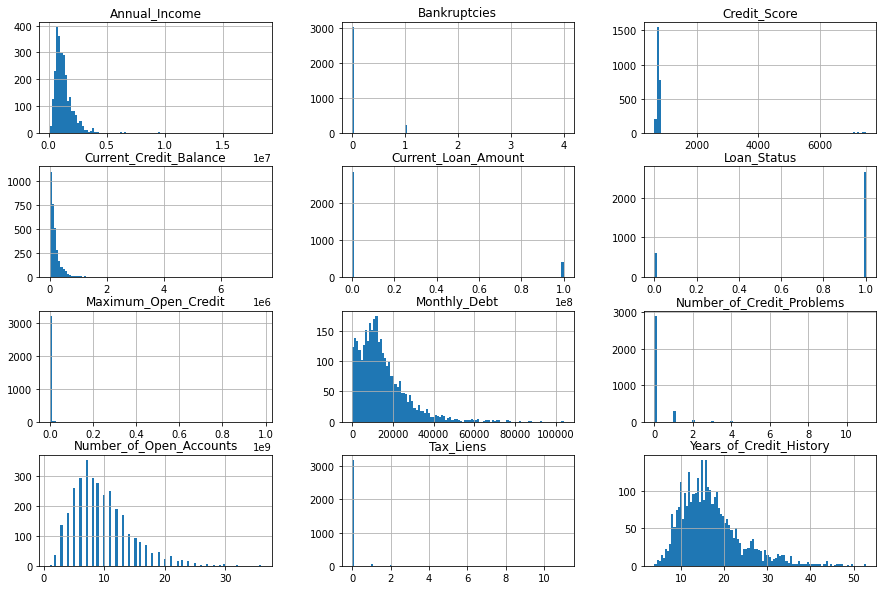

In [220]:
# Histograms for each column to see shape of distribution
Purpose_Other.hist(bins=100, figsize=(15, 10))

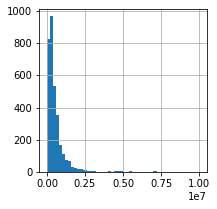

In [221]:
Purpose_Other['Maximum_Open_Credit'].hist(bins=50, figsize=(3, 3), range=(0,10000000))

In [222]:
# distributions are skewed, replace missing values with median
Purpose_Other = replace_median(Purpose_Other)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

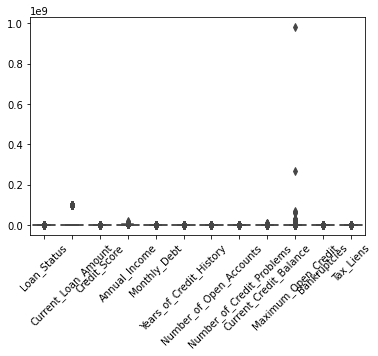

In [223]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Other)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [224]:
# remove outliers
Purpose_Other = remove_outliers(Purpose_Other)

Column  Current_Loan_Amount  had  401 outliers removed.
Column  Credit_Score  had  255 outliers removed.
Column  Annual_Income  had  249 outliers removed.
Column  Monthly_Debt  had  134 outliers removed.
Column  Years_of_Credit_History  had  125 outliers removed.
Column  Number_of_Open_Accounts  had  84 outliers removed.
Column  Number_of_Credit_Problems  had  345 outliers removed.
Column  Current_Credit_Balance  had  245 outliers removed.
Column  Maximum_Open_Credit  had  249 outliers removed.
Column  Bankruptcies  had  238 outliers removed.
Column  Tax_Liens  had  65 outliers removed.


In [225]:
Purpose_Other = normalize(Purpose_Other)

In [226]:
Purpose_Other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                3185 non-null   float64
 1   Current_Loan_Amount        3185 non-null   float64
 2   Credit_Score               3185 non-null   float64
 3   Annual_Income              3185 non-null   float64
 4   Monthly_Debt               3185 non-null   float64
 5   Years_of_Credit_History    3185 non-null   float64
 6   Number_of_Open_Accounts    3185 non-null   float64
 7   Number_of_Credit_Problems  3185 non-null   float64
 8   Current_Credit_Balance     3185 non-null   float64
 9   Maximum_Open_Credit        3185 non-null   float64
 10  Bankruptcies               3185 non-null   float64
 11  Tax_Liens                  3185 non-null   float64
dtypes: float64(12)
memory usage: 298.7 KB


#### 27. small_business

In [227]:
# assign name to dictionary element dataframe
Purpose_small_business = credit_subsets['Purpose_small_business'].drop(credit_subsets['Purpose_small_business'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0EC7C1D0>,
      dtype=object)

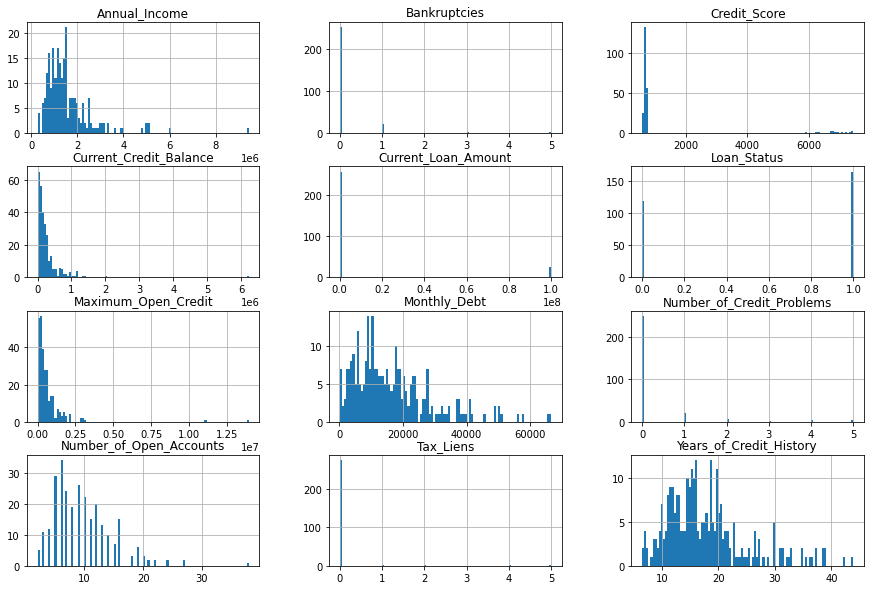

In [228]:
# Histograms for each column to see shape of distribution
Purpose_small_business.hist(bins=100, figsize=(15, 10))

In [229]:
# distributions are skewed, replace missing values with median
Purpose_small_business = replace_median(Purpose_small_business)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

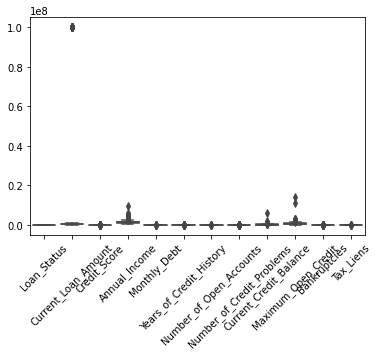

In [230]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_small_business)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [231]:
# remove outliers
Purpose_small_business = remove_outliers(Purpose_small_business)

Column  Current_Loan_Amount  had  26 outliers removed.
Column  Credit_Score  had  45 outliers removed.
Column  Annual_Income  had  22 outliers removed.
Column  Monthly_Debt  had  10 outliers removed.
Column  Years_of_Credit_History  had  17 outliers removed.
Column  Number_of_Open_Accounts  had  7 outliers removed.
Column  Number_of_Credit_Problems  had  33 outliers removed.
Column  Current_Credit_Balance  had  29 outliers removed.
Column  Maximum_Open_Credit  had  19 outliers removed.
Column  Bankruptcies  had  25 outliers removed.
Column  Tax_Liens  had  8 outliers removed.


In [232]:
Purpose_small_business = normalize(Purpose_small_business)

In [233]:
Purpose_small_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                275 non-null    float64
 1   Current_Loan_Amount        275 non-null    float64
 2   Credit_Score               275 non-null    float64
 3   Annual_Income              275 non-null    float64
 4   Monthly_Debt               275 non-null    float64
 5   Years_of_Credit_History    275 non-null    float64
 6   Number_of_Open_Accounts    275 non-null    float64
 7   Number_of_Credit_Problems  275 non-null    float64
 8   Current_Credit_Balance     275 non-null    float64
 9   Maximum_Open_Credit        275 non-null    float64
 10  Bankruptcies               275 non-null    float64
 11  Tax_Liens                  275 non-null    float64
dtypes: float64(12)
memory usage: 25.9 KB


#### 28. Medical_Bills

In [234]:
# assign name to dictionary element dataframe
Purpose_Medical_Bills = credit_subsets['Purpose_Medical_Bills'].drop(credit_subsets['Purpose_Medical_Bills'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D10664C50>,
      dtype=object)

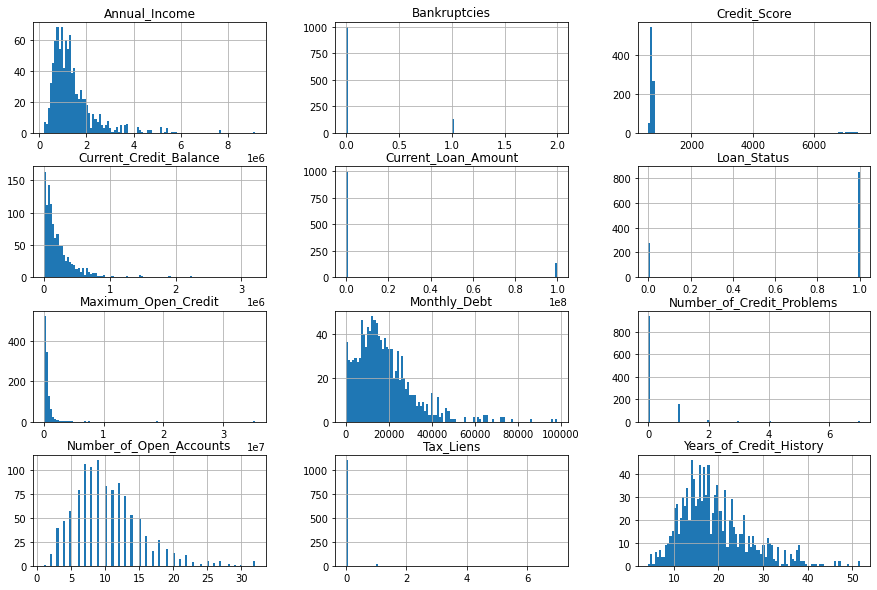

In [235]:
# Histograms for each column to see shape of distribution
Purpose_Medical_Bills.hist(bins=100, figsize=(15, 10))

In [236]:
# distributions are skewed, replace missing values with median
Purpose_Medical_Bills = replace_median(Purpose_Medical_Bills)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

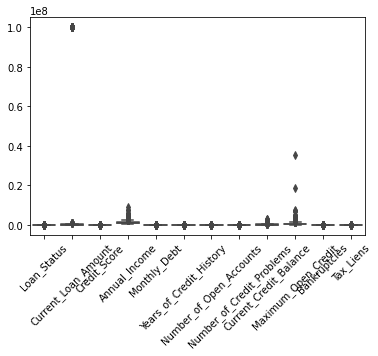

In [237]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Medical_Bills)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [238]:
# remove outliers
Purpose_Medical_Bills = remove_outliers(Purpose_Medical_Bills)

Column  Current_Loan_Amount  had  147 outliers removed.
Column  Credit_Score  had  112 outliers removed.
Column  Annual_Income  had  94 outliers removed.
Column  Monthly_Debt  had  36 outliers removed.
Column  Years_of_Credit_History  had  35 outliers removed.
Column  Number_of_Open_Accounts  had  28 outliers removed.
Column  Number_of_Credit_Problems  had  184 outliers removed.
Column  Current_Credit_Balance  had  80 outliers removed.
Column  Maximum_Open_Credit  had  73 outliers removed.
Column  Bankruptcies  had  133 outliers removed.
Column  Tax_Liens  had  26 outliers removed.


In [239]:
Purpose_Medical_Bills = normalize(Purpose_Medical_Bills)

In [240]:
Purpose_Medical_Bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                1101 non-null   float64
 1   Current_Loan_Amount        1101 non-null   float64
 2   Credit_Score               1101 non-null   float64
 3   Annual_Income              1101 non-null   float64
 4   Monthly_Debt               1101 non-null   float64
 5   Years_of_Credit_History    1101 non-null   float64
 6   Number_of_Open_Accounts    1101 non-null   float64
 7   Number_of_Credit_Problems  1101 non-null   float64
 8   Current_Credit_Balance     1101 non-null   float64
 9   Maximum_Open_Credit        1101 non-null   float64
 10  Bankruptcies               1101 non-null   float64
 11  Tax_Liens                  1101 non-null   float64
dtypes: float64(12)
memory usage: 103.3 KB


#### 29. wedding

In [241]:
# assign name to dictionary element dataframe
Purpose_wedding = credit_subsets['Purpose_wedding'].drop(credit_subsets['Purpose_wedding'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0FED8780>,
      dtype=object)

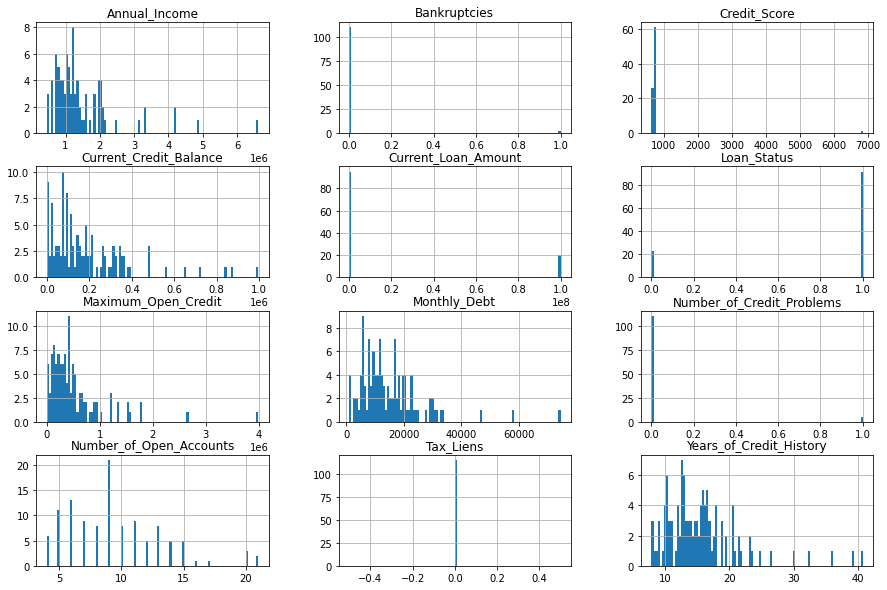

In [242]:
# Histograms for each column to see shape of distribution
Purpose_wedding.hist(bins=100, figsize=(15, 10))

The distribution is not very clear for Tax_Liens.  It turns out all values are 0, so replacing with median is ok anyway.

In [243]:
Purpose_wedding['Tax_Liens'].describe()

count    115.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Tax_Liens, dtype: float64

Tax_Liens has only one value, and won't contribute to the model.  This column can be dropped, but the *replace_median()* function can be applied first as it will consider the column and throw an error.

In [244]:
# distributions are skewed, replace missing values with median
Purpose_wedding = replace_median(Purpose_wedding)

In [245]:
Purpose_wedding.drop(['Tax_Liens'], axis=1, inplace=True)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies')]

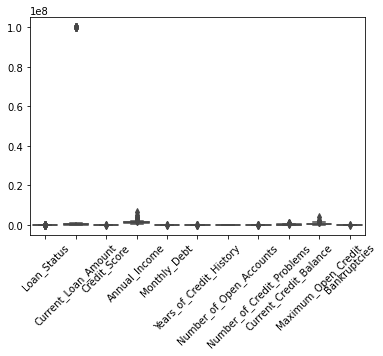

In [246]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_wedding)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [247]:
# remove outliers
Purpose_wedding = remove_outliers(Purpose_wedding)

Column  Current_Loan_Amount  had  20 outliers removed.
Column  Credit_Score  had  3 outliers removed.
Column  Annual_Income  had  11 outliers removed.
Column  Monthly_Debt  had  3 outliers removed.
Column  Years_of_Credit_History  had  6 outliers removed.
Column  Number_of_Open_Accounts  had  0 outliers removed.
Column  Number_of_Credit_Problems  had  5 outliers removed.
Column  Current_Credit_Balance  had  6 outliers removed.
Column  Maximum_Open_Credit  had  9 outliers removed.
Column  Bankruptcies  had  2 outliers removed.


In [248]:
Purpose_wedding = normalize(Purpose_wedding)

In [249]:
Purpose_wedding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                113 non-null    float64
 1   Current_Loan_Amount        113 non-null    float64
 2   Credit_Score               113 non-null    float64
 3   Annual_Income              113 non-null    float64
 4   Monthly_Debt               113 non-null    float64
 5   Years_of_Credit_History    113 non-null    float64
 6   Number_of_Open_Accounts    113 non-null    float64
 7   Number_of_Credit_Problems  113 non-null    float64
 8   Current_Credit_Balance     113 non-null    float64
 9   Maximum_Open_Credit        113 non-null    float64
 10  Bankruptcies               113 non-null    float64
dtypes: float64(11)
memory usage: 9.8 KB


#### 30. vacation

In [250]:
# assign name to dictionary element dataframe
Purpose_vacation = credit_subsets['Purpose_vacation'].drop(credit_subsets['Purpose_vacation'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D13AC2AC8>,
      dtype=object)

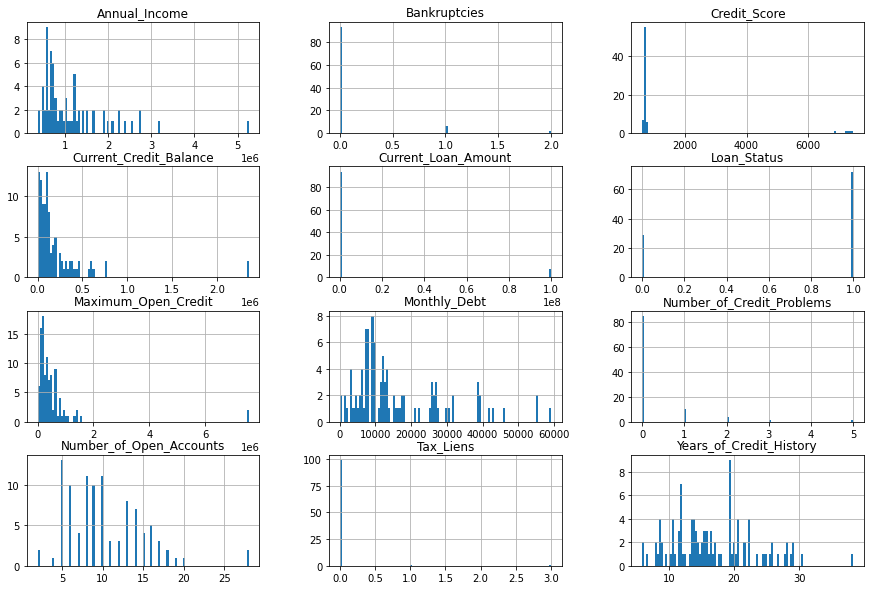

In [251]:
# Histograms for each column to see shape of distribution
Purpose_vacation.hist(bins=100, figsize=(15, 10))

In [252]:
# distributions are skewed, replace missing values with median
Purpose_vacation = replace_median(Purpose_vacation)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

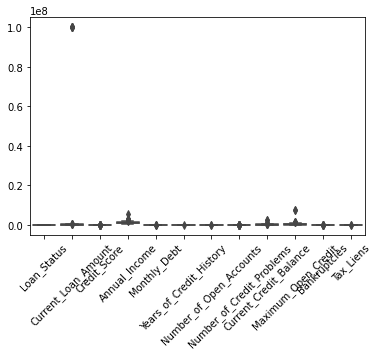

In [253]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_vacation)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [254]:
# remove outliers
Purpose_vacation = remove_outliers(Purpose_vacation)

Column  Current_Loan_Amount  had  12 outliers removed.
Column  Credit_Score  had  15 outliers removed.
Column  Annual_Income  had  10 outliers removed.
Column  Monthly_Debt  had  4 outliers removed.
Column  Years_of_Credit_History  had  1 outliers removed.
Column  Number_of_Open_Accounts  had  2 outliers removed.
Column  Number_of_Credit_Problems  had  16 outliers removed.
Column  Current_Credit_Balance  had  10 outliers removed.
Column  Maximum_Open_Credit  had  6 outliers removed.
Column  Bankruptcies  had  8 outliers removed.
Column  Tax_Liens  had  2 outliers removed.


In [255]:
Purpose_vacation = normalize(Purpose_vacation)

In [256]:
Purpose_vacation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                99 non-null     float64
 1   Current_Loan_Amount        99 non-null     float64
 2   Credit_Score               99 non-null     float64
 3   Annual_Income              99 non-null     float64
 4   Monthly_Debt               99 non-null     float64
 5   Years_of_Credit_History    99 non-null     float64
 6   Number_of_Open_Accounts    99 non-null     float64
 7   Number_of_Credit_Problems  99 non-null     float64
 8   Current_Credit_Balance     99 non-null     float64
 9   Maximum_Open_Credit        99 non-null     float64
 10  Bankruptcies               99 non-null     float64
 11  Tax_Liens                  99 non-null     float64
dtypes: float64(12)
memory usage: 9.4 KB


#### 31. Educational_Expenses

In [257]:
# assign name to dictionary element dataframe
Purpose_Educational_Expenses = credit_subsets['Purpose_Educational_Expenses'].drop(credit_subsets['Purpose_Educational_Expenses'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D14180DD8>,
      dtype=object)

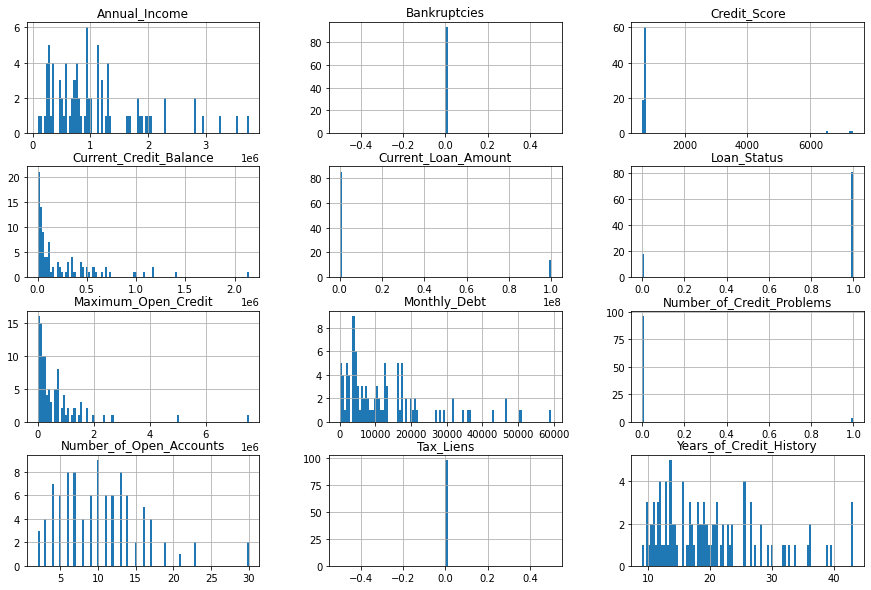

In [258]:
# Histograms for each column to see shape of distribution
Purpose_Educational_Expenses.hist(bins=100, figsize=(15, 10))

In [259]:
Purpose_Educational_Expenses[['Bankruptcies', 'Tax_Liens']].describe()

,Bankruptcies,Tax_Liens
count,93.0,98.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


Bankruptcies and Tax Liens have only one value, and so will not contribute to the model and can be dropped.

In [260]:
# distributions are skewed, replace missing values with median
Purpose_Educational_Expenses = replace_median(Purpose_Educational_Expenses)

In [261]:
Purpose_Educational_Expenses.drop(['Bankruptcies', 'Tax_Liens'], axis=1, inplace=True)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit')]

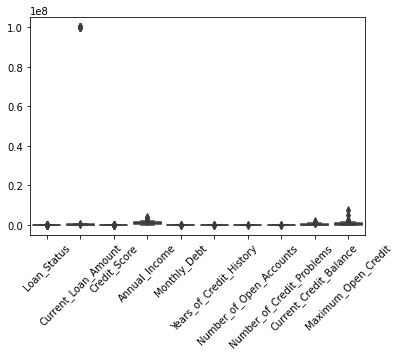

In [262]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_Educational_Expenses)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [263]:
# remove outliers
Purpose_Educational_Expenses = remove_outliers(Purpose_Educational_Expenses)

Column  Current_Loan_Amount  had  16 outliers removed.
Column  Credit_Score  had  13 outliers removed.
Column  Annual_Income  had  8 outliers removed.
Column  Monthly_Debt  had  5 outliers removed.
Column  Years_of_Credit_History  had  5 outliers removed.
Column  Number_of_Open_Accounts  had  2 outliers removed.
Column  Number_of_Credit_Problems  had  3 outliers removed.
Column  Current_Credit_Balance  had  7 outliers removed.
Column  Maximum_Open_Credit  had  7 outliers removed.


In [264]:
Purpose_Educational_Expenses.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Credit_Score', 'Annual_Income',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit'],
      dtype='object')

In [265]:
Purpose_Educational_Expenses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 629 to 99731
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                92 non-null     int64  
 1   Current_Loan_Amount        92 non-null     float64
 2   Credit_Score               92 non-null     float64
 3   Annual_Income              92 non-null     float64
 4   Monthly_Debt               92 non-null     float64
 5   Years_of_Credit_History    92 non-null     float64
 6   Number_of_Open_Accounts    92 non-null     float64
 7   Number_of_Credit_Problems  92 non-null     float64
 8   Current_Credit_Balance     92 non-null     float64
 9   Maximum_Open_Credit        92 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


In [266]:
Purpose_Educational_Expenses = normalize(Purpose_Educational_Expenses)

In [267]:
Purpose_Educational_Expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                92 non-null     float64
 1   Current_Loan_Amount        92 non-null     float64
 2   Credit_Score               92 non-null     float64
 3   Annual_Income              92 non-null     float64
 4   Monthly_Debt               92 non-null     float64
 5   Years_of_Credit_History    92 non-null     float64
 6   Number_of_Open_Accounts    92 non-null     float64
 7   Number_of_Credit_Problems  92 non-null     float64
 8   Current_Credit_Balance     92 non-null     float64
 9   Maximum_Open_Credit        92 non-null     float64
dtypes: float64(10)
memory usage: 7.3 KB


#### 32. moving

In [268]:
# assign name to dictionary element dataframe
Purpose_moving = credit_subsets['Purpose_moving'].drop(credit_subsets['Purpose_moving'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D1780D7F0>,
      dtype=object)

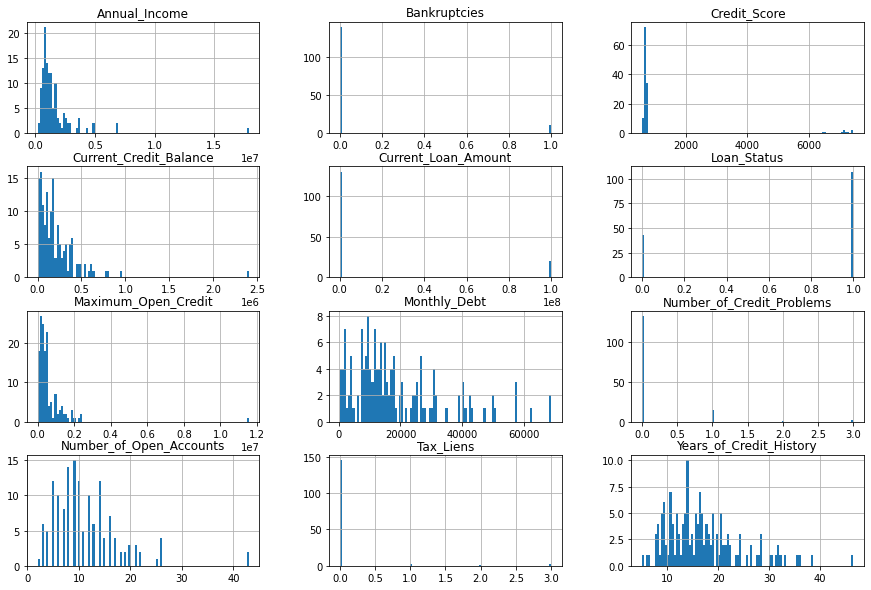

In [269]:
# Histograms for each column to see shape of distribution
Purpose_moving.hist(bins=100, figsize=(15, 10))

In [270]:
# distributions are skewed, replace missing values with median
Purpose_moving = replace_median(Purpose_moving)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Number_of_Credit_Problems'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax_Liens')]

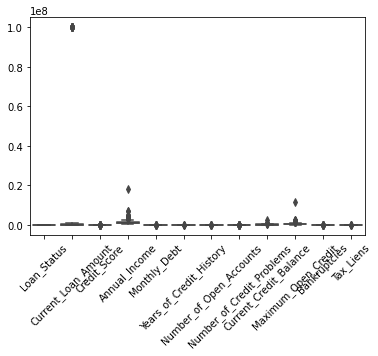

In [271]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_moving)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [272]:
# remove outliers
Purpose_moving = remove_outliers(Purpose_moving)

Column  Current_Loan_Amount  had  20 outliers removed.
Column  Credit_Score  had  18 outliers removed.
Column  Annual_Income  had  14 outliers removed.
Column  Monthly_Debt  had  9 outliers removed.
Column  Years_of_Credit_History  had  4 outliers removed.
Column  Number_of_Open_Accounts  had  7 outliers removed.
Column  Number_of_Credit_Problems  had  17 outliers removed.
Column  Current_Credit_Balance  had  7 outliers removed.
Column  Maximum_Open_Credit  had  19 outliers removed.
Column  Bankruptcies  had  11 outliers removed.
Column  Tax_Liens  had  5 outliers removed.


In [273]:
Purpose_moving = normalize(Purpose_moving)

In [274]:
Purpose_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_Status                145 non-null    float64
 1   Current_Loan_Amount        145 non-null    float64
 2   Credit_Score               145 non-null    float64
 3   Annual_Income              145 non-null    float64
 4   Monthly_Debt               145 non-null    float64
 5   Years_of_Credit_History    145 non-null    float64
 6   Number_of_Open_Accounts    145 non-null    float64
 7   Number_of_Credit_Problems  145 non-null    float64
 8   Current_Credit_Balance     145 non-null    float64
 9   Maximum_Open_Credit        145 non-null    float64
 10  Bankruptcies               145 non-null    float64
 11  Tax_Liens                  145 non-null    float64
dtypes: float64(12)
memory usage: 13.7 KB


#### 33. renewable_energy

In [275]:
# assign name to dictionary element dataframe
Purpose_renewable_energy = credit_subsets['Purpose_renewable_energy'].drop(credit_subsets['Purpose_renewable_energy'].columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D132DC630>,
      dtype=object)

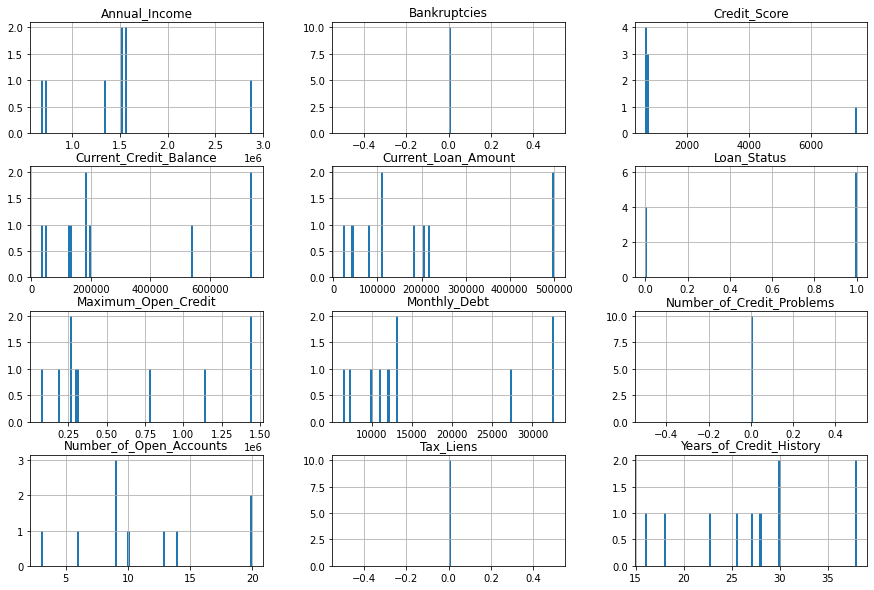

In [276]:
# Histograms for each column to see shape of distribution
Purpose_renewable_energy.hist(bins=100, figsize=(15, 10))

In [277]:
Purpose_renewable_energy[['Bankruptcies', 'Number_of_Credit_Problems', 'Tax_Liens']].describe()

,Bankruptcies,Number_of_Credit_Problems,Tax_Liens
count,10.0,10.0,10.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [278]:
# distributions are skewed, replace missing values with median
Purpose_renewable_energy = replace_median(Purpose_renewable_energy)

Bankruptcies, Number_of_Credit_Problems and Tax_Liens can be dropped.  The __replace_median()__ function threw errors when it encountered the lack of these columns.  Applying it before dropping makes no difference, since all values are 0 for these columns anyway.

In [279]:
Purpose_renewable_energy.drop(['Bankruptcies', 'Number_of_Credit_Problems', 'Tax_Liens'], axis=1, inplace=True)

[Text(0, 0, 'Loan_Status'),
 Text(0, 0, 'Current_Loan_Amount'),
 Text(0, 0, 'Credit_Score'),
 Text(0, 0, 'Annual_Income'),
 Text(0, 0, 'Monthly_Debt'),
 Text(0, 0, 'Years_of_Credit_History'),
 Text(0, 0, 'Number_of_Open_Accounts'),
 Text(0, 0, 'Current_Credit_Balance'),
 Text(0, 0, 'Maximum_Open_Credit')]

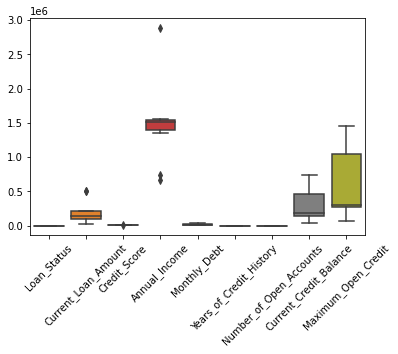

In [280]:
# boxplot for visualization of outliers
ax = sns.boxplot( data = Purpose_renewable_energy)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [281]:
# remove outliers
Purpose_renewable_energy = remove_outliers(Purpose_renewable_energy)

Column  Current_Loan_Amount  had  2 outliers removed.
Column  Credit_Score  had  1 outliers removed.
Column  Annual_Income  had  3 outliers removed.
Column  Monthly_Debt  had  0 outliers removed.
Column  Years_of_Credit_History  had  0 outliers removed.
Column  Number_of_Open_Accounts  had  0 outliers removed.
Column  Current_Credit_Balance  had  0 outliers removed.
Column  Maximum_Open_Credit  had  0 outliers removed.


In [282]:
Purpose_renewable_energy = normalize(Purpose_renewable_energy)

In [283]:
Purpose_renewable_energy.describe()

,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.366393,0.106789,0.366580,0.386685,0.513636,0.488235,0.369269,0.401530
std,0.516398,0.360046,0.313880,0.270041,0.389991,0.332147,0.325809,0.385741,0.389478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.137988,0.005865,0.325646,0.141442,0.332955,0.352941,0.139762,0.149577
50%,1.000000,0.258513,0.008798,0.381972,0.235922,0.522727,0.382353,0.217184,0.171733
75%,1.000000,0.399713,0.012280,0.396185,0.663230,0.631818,0.632353,0.595450,0.710410
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [284]:
Purpose_renewable_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_Status              10 non-null     float64
 1   Current_Loan_Amount      10 non-null     float64
 2   Credit_Score             10 non-null     float64
 3   Annual_Income            10 non-null     float64
 4   Monthly_Debt             10 non-null     float64
 5   Years_of_Credit_History  10 non-null     float64
 6   Number_of_Open_Accounts  10 non-null     float64
 7   Current_Credit_Balance   10 non-null     float64
 8   Maximum_Open_Credit      10 non-null     float64
dtypes: float64(9)
memory usage: 848.0 bytes


In [285]:
# create dictionary of cleaned dataframe subsets
cleandf_dict_1 = {'Term_Short_Term':Term_Short_Term, 'Term_Long_Term':Term_Long_Term, 
                'Years_in_current_job_less1_year':Years_in_current_job_less1_year,
                'Years_in_current_job_1_year': Years_in_current_job_1_year,
                'Years_in_current_job_2_years': Years_in_current_job_2_years,
                'Years_in_current_job_3_years': Years_in_current_job_3_years, 
                'Years_in_current_job_4_years': Years_in_current_job_4_years,
                'Years_in_current_job_5_years': Years_in_current_job_5_years,
                'Years_in_current_job_6_years':Years_in_current_job_6_years,
                'Years_in_current_job_7_years': Years_in_current_job_7_years,
                'Years_in_current_job_8_years': Years_in_current_job_8_years,
                'Years_in_current_job_9_years': Years_in_current_job_9_years,
                'Years_in_current_job_10plus_years': Years_in_current_job_10plus_years,
                'Home_Ownership_Home_Mortgage':Home_Ownership_Home_Mortgage,
                'Home_Ownership_Own_Home':Home_Ownership_Own_Home,
                'Home_Ownership_Rent':Home_Ownership_Rent,
                'Home_Ownership_HaveMortgage': Home_Ownership_HaveMortgage,
                'Purpose_Home_Improvements':Purpose_Home_Improvements,
                'Purpose_Debt_Consolidation': Purpose_Debt_Consolidation,
                'Purpose_Buy_House':Purpose_Buy_House, 
                'Purpose_other':Purpose_other,
                'Purpose_Business_Loan': Purpose_Business_Loan,
                'Purpose_Buy_a_Car':Purpose_Buy_a_Car,
                'Purpose_major_purchase': Purpose_major_purchase,
                'Purpose_Take_a_Trip':Purpose_Take_a_Trip,
                'Purpose_Other':Purpose_Other,
                'Purpose_small_business': Purpose_small_business,
                'Purpose_Medical_Bills':Purpose_Medical_Bills,
                'Purpose_wedding':Purpose_wedding,
                'Purpose_vacation': Purpose_vacation,
                'Purpose_Educational_Expenses':Purpose_Educational_Expenses, 
                'Purpose_moving': Purpose_moving,
                'Purpose_renewable_energy':Purpose_renewable_energy}

In [286]:
cleandf_dict_1.keys()

dict_keys(['Term_Short_Term', 'Term_Long_Term', 'Years_in_current_job_less1_year', 'Years_in_current_job_1_year', 'Years_in_current_job_2_years', 'Years_in_current_job_3_years', 'Years_in_current_job_4_years', 'Years_in_current_job_5_years', 'Years_in_current_job_6_years', 'Years_in_current_job_7_years', 'Years_in_current_job_8_years', 'Years_in_current_job_9_years', 'Years_in_current_job_10plus_years', 'Home_Ownership_Home_Mortgage', 'Home_Ownership_Own_Home', 'Home_Ownership_Rent', 'Home_Ownership_HaveMortgage', 'Purpose_Home_Improvements', 'Purpose_Debt_Consolidation', 'Purpose_Buy_House', 'Purpose_other', 'Purpose_Business_Loan', 'Purpose_Buy_a_Car', 'Purpose_major_purchase', 'Purpose_Take_a_Trip', 'Purpose_Other', 'Purpose_small_business', 'Purpose_Medical_Bills', 'Purpose_wedding', 'Purpose_vacation', 'Purpose_Educational_Expenses', 'Purpose_moving', 'Purpose_renewable_energy'])

In [287]:
# check number of rows in each subset
for name in cleandf_dict_1.keys():
    n_rows = len(cleandf_dict_1[name])
    print(name)
    print('Number of rows:  ', n_rows)

Term_Short_Term
Number of rows:   70796
Term_Long_Term
Number of rows:   27276
Years_in_current_job_less1_year
Number of rows:   8049
Years_in_current_job_1_year
Number of rows:   6460
Years_in_current_job_2_years
Number of rows:   8974
Years_in_current_job_3_years
Number of rows:   8043
Years_in_current_job_4_years
Number of rows:   6143
Years_in_current_job_5_years
Number of rows:   6664
Years_in_current_job_6_years
Number of rows:   5583
Years_in_current_job_7_years
Number of rows:   5472
Years_in_current_job_8_years
Number of rows:   4485
Years_in_current_job_9_years
Number of rows:   3865
Years_in_current_job_10plus_years
Number of rows:   30481
Home_Ownership_Home_Mortgage
Number of rows:   47437
Home_Ownership_Own_Home
Number of rows:   8980
Home_Ownership_Rent
Number of rows:   41445
Home_Ownership_HaveMortgage
Number of rows:   210
Purpose_Home_Improvements
Number of rows:   5698
Purpose_Debt_Consolidation
Number of rows:   77090
Purpose_Buy_House
Number of rows:   661
Purpose

In [308]:
for name in cleandf_dict_1.keys():
    n_cols = cleandf_dict_1[name].shape[1]
    print(name)
    print('Number of cols:  ', n_cols)

Term_Short_Term
Number of cols:   12
Term_Long_Term
Number of cols:   12
Years_in_current_job_less1_year
Number of cols:   12
Years_in_current_job_1_year
Number of cols:   12
Years_in_current_job_2_years
Number of cols:   12
Years_in_current_job_3_years
Number of cols:   12
Years_in_current_job_4_years
Number of cols:   12
Years_in_current_job_5_years
Number of cols:   12
Years_in_current_job_6_years
Number of cols:   12
Years_in_current_job_7_years
Number of cols:   12
Years_in_current_job_8_years
Number of cols:   12
Years_in_current_job_9_years
Number of cols:   12
Years_in_current_job_10plus_years
Number of cols:   12
Home_Ownership_Home_Mortgage
Number of cols:   12
Home_Ownership_Own_Home
Number of cols:   12
Home_Ownership_Rent
Number of cols:   12
Home_Ownership_HaveMortgage
Number of cols:   12
Purpose_Home_Improvements
Number of cols:   12
Purpose_Debt_Consolidation
Number of cols:   12
Purpose_Buy_House
Number of cols:   12
Purpose_other
Number of cols:   12
Purpose_Business

Subsets that have less than 100 rows can be dropped.  This assures an at least percent-wise splitting occurs on an individual row level.  For instance, a 70/30 train/test split would have at least one row of data in each split set to be used in modeling.  Given the fairly large number of rows to begin with, and that of other subsets, this scheme seems like a reasonable preventative measure to avoid potential over and under fitting.  If it turns out that the hypothosis of this effort needs to be rejected, then this criteria can be revisited and adjusted.

In [288]:
# drop subsets with less than 100 rows
cleandf_dict = {key: val for key,
            val in cleandf_dict_1.items() if len(cleandf_dict_1[key]) > 100}

In [289]:
cleandf_dict.keys()

dict_keys(['Term_Short_Term', 'Term_Long_Term', 'Years_in_current_job_less1_year', 'Years_in_current_job_1_year', 'Years_in_current_job_2_years', 'Years_in_current_job_3_years', 'Years_in_current_job_4_years', 'Years_in_current_job_5_years', 'Years_in_current_job_6_years', 'Years_in_current_job_7_years', 'Years_in_current_job_8_years', 'Years_in_current_job_9_years', 'Years_in_current_job_10plus_years', 'Home_Ownership_Home_Mortgage', 'Home_Ownership_Own_Home', 'Home_Ownership_Rent', 'Home_Ownership_HaveMortgage', 'Purpose_Home_Improvements', 'Purpose_Debt_Consolidation', 'Purpose_Buy_House', 'Purpose_other', 'Purpose_Business_Loan', 'Purpose_Buy_a_Car', 'Purpose_major_purchase', 'Purpose_Take_a_Trip', 'Purpose_Other', 'Purpose_small_business', 'Purpose_Medical_Bills', 'Purpose_wedding', 'Purpose_moving'])

In [290]:
for name in cleandf_dict.keys():
    n_rows = len(cleandf_dict[name])
    print(name)
    print('Number of rows:  ', n_rows)

Term_Short_Term
Number of rows:   70796
Term_Long_Term
Number of rows:   27276
Years_in_current_job_less1_year
Number of rows:   8049
Years_in_current_job_1_year
Number of rows:   6460
Years_in_current_job_2_years
Number of rows:   8974
Years_in_current_job_3_years
Number of rows:   8043
Years_in_current_job_4_years
Number of rows:   6143
Years_in_current_job_5_years
Number of rows:   6664
Years_in_current_job_6_years
Number of rows:   5583
Years_in_current_job_7_years
Number of rows:   5472
Years_in_current_job_8_years
Number of rows:   4485
Years_in_current_job_9_years
Number of rows:   3865
Years_in_current_job_10plus_years
Number of rows:   30481
Home_Ownership_Home_Mortgage
Number of rows:   47437
Home_Ownership_Own_Home
Number of rows:   8980
Home_Ownership_Rent
Number of rows:   41445
Home_Ownership_HaveMortgage
Number of rows:   210
Purpose_Home_Improvements
Number of rows:   5698
Purpose_Debt_Consolidation
Number of rows:   77090
Purpose_Buy_House
Number of rows:   661
Purpose

In [291]:
# preview of one subset
cleandf_dict['Purpose_moving'].head()

,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1.0,0.000652,0.021914,0.000000,0.028584,0.137349,0.048780,0.0,0.000166,0.019788,0.0,0.0
1,1.0,0.000301,0.018408,0.014065,0.104285,0.098795,0.170732,0.0,0.029792,0.011431,0.0,0.0
2,1.0,0.004116,0.011103,0.051087,0.175196,0.163855,0.097561,0.0,0.094748,0.030941,0.0,0.0
3,0.0,0.003109,0.951790,0.047144,0.200538,0.190361,0.170732,0.0,0.010831,0.006527,0.0,0.0
4,1.0,0.000537,0.019284,0.063518,0.169453,0.118072,0.146341,0.0,0.041145,0.011961,0.0,0.0


# Analysis

Since AUC score was emphasized as the feature selection metric, the __rfe()__ function was made to output AUC and accuracy scores as succesive features were added to models.  

In [292]:
# import packages used for model creation 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression

In [293]:
# takes cleaned dictionary of dataframes
# iteratively selects features and prints AUC and accuracy scores of resulting models

def rfe(df_dict):
    n = 0
    log_dict = {}
    for name in df_dict.keys():
    
        new_df = df_dict[name]
        X = new_df.drop(new_df.columns[0], axis=1)
        y = new_df.iloc[:,0]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
        n = n+1
        print('\n', 'Number of subsets: ', n, '.  Subset name: ', name, '\n')
        
        for i in range(X.shape[1]):
            print(i+2)
            rfe = RFE(estimator=LogisticRegression(), n_features_to_select=i+2)
            rfe.fit(X_train, y_train)
            X_train_cols = X_train.columns[rfe.support_]           
            y_pred = rfe.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred)
            print('Selecting ', i+2, 'features.  Accuracy: ', acc, 'ROC_AUC: ', auc)


In [294]:
model_dict_features = rfe(cleandf_dict)


 Number of subsets:  1 .  Subset name:  Term_Short_Term 

2
Selecting  2 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
3
Selecting  3 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
4
Selecting  4 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
5
Selecting  5 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
6
Selecting  6 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
7
Selecting  7 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
8
Selecting  8 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
9
Selecting  9 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
10
Selecting  10 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
11
Selecting  11 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361
12
Selecting  12 features.  Accuracy:  0.8434954564715853 ROC_AUC:  0.6038140643623361


Selecting  5 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309
6
Selecting  6 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309
7
Selecting  7 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309
8
Selecting  8 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309
9
Selecting  9 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309
10
Selecting  10 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309
11
Selecting  11 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309
12
Selecting  12 features.  Accuracy:  0.8113432835820895 ROC_AUC:  0.5979643765903309

 Number of subsets:  10 .  Subset name:  Years_in_current_job_7_years 

2
Selecting  2 features.  Accuracy:  0.8172959805115713 ROC_AUC:  0.6173469387755102
3
Selecting  3 features.  Accuracy:  0.8172959805115713 ROC_AUC:  0.6173469387755102
4
Selecting  4 features.  Accuracy:  0.8172959805115713 ROC_AUC:  0.61734

Selecting  9 features.  Accuracy:  0.7936507936507936 ROC_AUC:  0.5
10
Selecting  10 features.  Accuracy:  0.7936507936507936 ROC_AUC:  0.5
11
Selecting  11 features.  Accuracy:  0.7936507936507936 ROC_AUC:  0.5
12
Selecting  12 features.  Accuracy:  0.7936507936507936 ROC_AUC:  0.5

 Number of subsets:  18 .  Subset name:  Purpose_Home_Improvements 

2
Selecting  2 features.  Accuracy:  0.8403508771929824 ROC_AUC:  0.6043478260869566
3
Selecting  3 features.  Accuracy:  0.8403508771929824 ROC_AUC:  0.6043478260869566
4
Selecting  4 features.  Accuracy:  0.8403508771929824 ROC_AUC:  0.6043478260869566
5
Selecting  5 features.  Accuracy:  0.8403508771929824 ROC_AUC:  0.6043478260869566
6
Selecting  6 features.  Accuracy:  0.8403508771929824 ROC_AUC:  0.6043478260869566
7
Selecting  7 features.  Accuracy:  0.8403508771929824 ROC_AUC:  0.6043478260869566
8
Selecting  8 features.  Accuracy:  0.8403508771929824 ROC_AUC:  0.6043478260869566
9
Selecting  9 features.  Accuracy:  0.840350877192

Selecting  2 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
3
Selecting  3 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
4
Selecting  4 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
5
Selecting  5 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
6
Selecting  6 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
7
Selecting  7 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
8
Selecting  8 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
9
Selecting  9 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
10
Selecting  10 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
11
Selecting  11 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333
12
Selecting  12 features.  Accuracy:  0.8430962343096234 ROC_AUC:  0.5833333333333333

 Number of subsets:  27 .  Subset name:  Purpose_small_busin

The output above shows the accuracy and ROC_AUC scores for models fitted with 2 or more features for each segment.  All but 2 of the segments - Home_Ownership_HaveMortgage, Purpose_Wedding resulted in AUC scores of 0.5 for 2 features.  An AUC of 0.5 can be interpreted as a model performing as well as random guessing. (Zach, 2021).  The 27 subsets with 2 predictor feature models with an AUC greater than 0.5 classify the target with at least more significance than random selection.  In this sense, the original hypothosis should not be rejected.  Furthermore, most of these models have accuracies in the mid-80 percent ranges.

Having only 2 features for each segment would not say so much about comparative influence on loan status.  Also, the way the models were fitted by incrementally adding 1 more feature is essentially forward stepwise feature selection.  Only 2 subsets had a change in accuracy and auc scores.  Home_Ownership_Rent saw a decrease in AUC after 3 features were added, and the AUC for Home_Ownership_HaveMortgage peaked and began to decrease after 6.  For the final models, RFECV can select which features to keep using cross validation on randomized sets of varying number of features.  RFECV, as used here, specified AUS scores to determine which features to keep. 

In [295]:
# takes cleaned dictionary of dataframes
# eliminates low AUC columns using rfe
# returns dictionary of dataframes with "good" fitting columns

def rfe_final(df_dict):
    log_dict = {}
    for name in df_dict.keys():
        print(name)   
        new_df = df_dict[name]
        X = new_df.drop(new_df.columns[0], axis=1)
        y = new_df[['Loan_Status']]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        # define RFE
        rfe = RFECV(estimator=LogisticRegression(), scoring='roc_auc')

        # fit RFE
        rfe.fit(X_train, y_train)
        for i in range(X_train.shape[1]):
            col = list(X_train.iloc[:,i:i+1].columns)
            # drop columns that rfe did not select
            
            if rfe.support_[i] == False:
                new_df.drop(col, axis=1)
        log_dict[name] = new_df
    
    return(log_dict)

In [296]:
final_dict = rfe_final(cleandf_dict)

Term_Short_Term
Term_Long_Term
Years_in_current_job_less1_year
Years_in_current_job_1_year
Years_in_current_job_2_years
Years_in_current_job_3_years
Years_in_current_job_4_years
Years_in_current_job_5_years
Years_in_current_job_6_years
Years_in_current_job_7_years
Years_in_current_job_8_years
Years_in_current_job_9_years
Years_in_current_job_10plus_years
Home_Ownership_Home_Mortgage
Home_Ownership_Own_Home
Home_Ownership_Rent
Home_Ownership_HaveMortgage
Purpose_Home_Improvements
Purpose_Debt_Consolidation
Purpose_Buy_House
Purpose_other
Purpose_Business_Loan
Purpose_Buy_a_Car
Purpose_major_purchase
Purpose_Take_a_Trip
Purpose_Other
Purpose_small_business
Purpose_Medical_Bills
Purpose_wedding
Purpose_moving


The __rfe_final()__ function returned the dictionary, final_dict, which now holds only features that RFECV selected for each subset.  The final logit models can be created with these dataframes.

In [297]:
# initialize empty data frame with predictor features as column names to hold coefficients
# used in logreg() function below
slope_df = pd.DataFrame(columns= final_dict.keys())

In [298]:
# segmented logistic classification function 
# returns dataframe of segments, accuracy and coefficients labeled by predictive feature


def logreg(df_dict):
    segments = []
    accuracy = []
    aucs = []
    slope_df = pd.DataFrame(columns = pred_cols) 

    for name in df_dict.keys():
        new_df = df_dict[name]

        X = new_df.drop(new_df.columns[0], axis=1)
        y = new_df[new_df.columns[0]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
        logreg = linear_model.LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),2)
        coef = logreg.coef_
        slopes = list(coef[0])
        slopes = [round(item,2) for item in slopes]
        cols = list(col for col in X.columns)
        slop = pd.DataFrame(columns = cols)

        
        data_to_append = {}
        for i in range(len(slop.columns)):
            data_to_append[slop.columns[i]] = slopes[i]
        slop = slop.append(data_to_append, ignore_index = True)
        
        m=len(slop.columns)
        for i in range(len(slope_df.columns)):    
            if i+1 > m:
                slop['dummy'] = 0
            if slop.columns[i] != slope_df.columns[i]:
                slop.insert(i,slope_df.columns[i], 0)
         
        if 'dummy' in slop.columns:
            slop.drop('dummy', axis=1, inplace=True)
            
        slope_df = pd.concat([slope_df,slop], axis=0)
        
        segments.append(name)
        accuracy.append(acc)

        acc_df = pd.DataFrame(list(zip(segments, accuracy)), columns = ['Segment', 'Accuracy'])
        
    slope_df.reset_index(drop=True,inplace=True)  
    acc_df.reset_index(drop=True,inplace=True)
    
    log_df = pd.concat([acc_df, slope_df], axis=1)

    return(log_df)  

In [299]:
final_dict.keys()

dict_keys(['Term_Short_Term', 'Term_Long_Term', 'Years_in_current_job_less1_year', 'Years_in_current_job_1_year', 'Years_in_current_job_2_years', 'Years_in_current_job_3_years', 'Years_in_current_job_4_years', 'Years_in_current_job_5_years', 'Years_in_current_job_6_years', 'Years_in_current_job_7_years', 'Years_in_current_job_8_years', 'Years_in_current_job_9_years', 'Years_in_current_job_10plus_years', 'Home_Ownership_Home_Mortgage', 'Home_Ownership_Own_Home', 'Home_Ownership_Rent', 'Home_Ownership_HaveMortgage', 'Purpose_Home_Improvements', 'Purpose_Debt_Consolidation', 'Purpose_Buy_House', 'Purpose_other', 'Purpose_Business_Loan', 'Purpose_Buy_a_Car', 'Purpose_major_purchase', 'Purpose_Take_a_Trip', 'Purpose_Other', 'Purpose_small_business', 'Purpose_Medical_Bills', 'Purpose_wedding', 'Purpose_moving'])

# Data Summary and Implications

30 subset dataframes resulted from the above data cleaning procedures and feature reduction action of RFECV.  The above function __logreg()__ was used to fit logit models on each subset using a 70/30 train-test split.  75/25 and 80/20 were other proportions tried, but the split used here resulted in better overall accuracies during the previous RFE output analysis and final model fitting.  Cross validation on the 3 train-test split proportions could have been used in during the RFE and AUC exploration phase, but the output from that function was rather long to begin with, so I decided not to include it in this write up.  

__logreg()__ also composes a model summary by segment.  Each row corresponds to a subsetted segment and has a column for accuracy.  The coefficients for each predictive column are labeled by column name.  Results can be viewed as a color coded heatmap-style table.  The most impactful influencers on loan payback may be better visualized using scatter plots of slope/coefficient versus accuracy for each segment.  The plots below are filtered to include only top 5 accuracy or slope for each segment, and are labeled by predictor variable.  This allows for both slope and accuracy to be considered when determining the most influential factors.  

In [300]:
summary = logreg(final_dict)

In [301]:
len(summary)

30

In [306]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Segment                    30 non-null     object 
 1   Accuracy                   30 non-null     float64
 2   Current_Loan_Amount        30 non-null     float64
 3   Credit_Score               30 non-null     float64
 4   Annual_Income              30 non-null     float64
 5   Monthly_Debt               30 non-null     float64
 6   Years_of_Credit_History    30 non-null     float64
 7   Number_of_Open_Accounts    30 non-null     float64
 8   Number_of_Credit_Problems  30 non-null     float64
 9   Current_Credit_Balance     30 non-null     float64
 10  Maximum_Open_Credit        30 non-null     float64
 11  Bankruptcies               30 non-null     float64
 12  Tax_Liens                  30 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.2+ KB


In [302]:
summary.head(30)

,Segment,Accuracy,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Term_Short_Term,0.84,5.59,-7.27,4.50,0.56,0.59,-0.54,-0.46,1.10,0.70,0.51,0.00
1,Term_Long_Term,0.76,4.85,-6.58,5.57,-1.72,0.17,0.01,0.39,1.41,0.25,-0.16,0.00
2,Years_in_current_job_less1_year,0.81,3.84,-5.39,2.84,-0.24,-0.29,0.02,0.04,-0.28,0.06,-0.47,0.00
3,Years_in_current_job_1_year,0.81,3.54,-5.38,3.15,-0.01,-0.07,-0.02,-0.24,-0.24,0.38,1.04,-0.21
4,Years_in_current_job_2_years,0.83,3.93,-5.48,2.65,-0.12,-0.22,-0.20,0.36,0.26,0.36,0.26,0.00
5,Years_in_current_job_3_years,0.83,3.68,-5.48,2.43,-1.37,0.35,-0.52,-0.04,0.81,0.11,-0.23,0.00
6,Years_in_current_job_4_years,0.81,3.59,-5.04,1.59,-0.53,0.22,-0.06,0.25,-0.47,0.50,-0.13,0.40
7,Years_in_current_job_5_years,0.82,3.72,-5.12,1.91,-1.05,0.37,-0.33,0.08,0.20,-0.09,-0.23,0.00
8,Years_in_current_job_6_years,0.81,3.55,-5.11,1.76,0.03,1.10,-0.57,0.22,0.52,0.08,0.13,0.00
9,Years_in_current_job_7_years,0.82,3.47,-5.13,2.73,-0.92,0.32,-1.04,0.12,0.39,0.89,0.67,0.00


In [303]:
# "heatmap" dataframe in color coded form
summary.style.background_gradient(cmap='Reds', axis=0).set_precision(2).set_properties(**{'max-width': '1000px', 'font-size': '8pt'})

,Segment,Accuracy,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Term_Short_Term,0.84,5.59,-7.27,4.50,0.56,0.59,-0.54,-0.46,1.10,0.70,0.51,0.00
1,Term_Long_Term,0.76,4.85,-6.58,5.57,-1.72,0.17,0.01,0.39,1.41,0.25,-0.16,0.00
2,Years_in_current_job_less1_year,0.81,3.84,-5.39,2.84,-0.24,-0.29,0.02,0.04,-0.28,0.06,-0.47,0.00
3,Years_in_current_job_1_year,0.81,3.54,-5.38,3.15,-0.01,-0.07,-0.02,-0.24,-0.24,0.38,1.04,-0.21
4,Years_in_current_job_2_years,0.83,3.93,-5.48,2.65,-0.12,-0.22,-0.20,0.36,0.26,0.36,0.26,0.00
5,Years_in_current_job_3_years,0.83,3.68,-5.48,2.43,-1.37,0.35,-0.52,-0.04,0.81,0.11,-0.23,0.00
6,Years_in_current_job_4_years,0.81,3.59,-5.04,1.59,-0.53,0.22,-0.06,0.25,-0.47,0.50,-0.13,0.40
7,Years_in_current_job_5_years,0.82,3.72,-5.12,1.91,-1.05,0.37,-0.33,0.08,0.20,-0.09,-0.23,0.00
8,Years_in_current_job_6_years,0.81,3.55,-5.11,1.76,0.03,1.10,-0.57,0.22,0.52,0.08,0.13,0.00
9,Years_in_current_job_7_years,0.82,3.47,-5.13,2.73,-0.92,0.32,-1.04,0.12,0.39,0.89,0.67,0.00


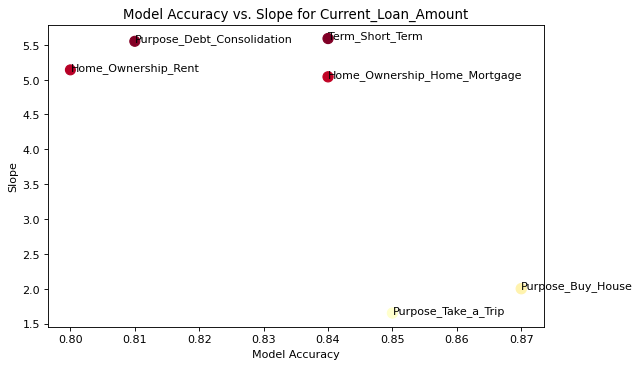

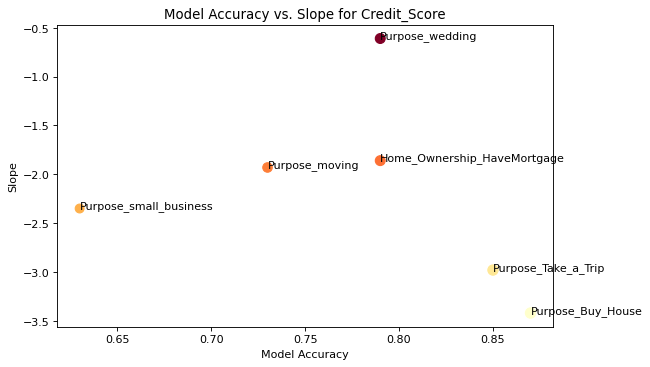

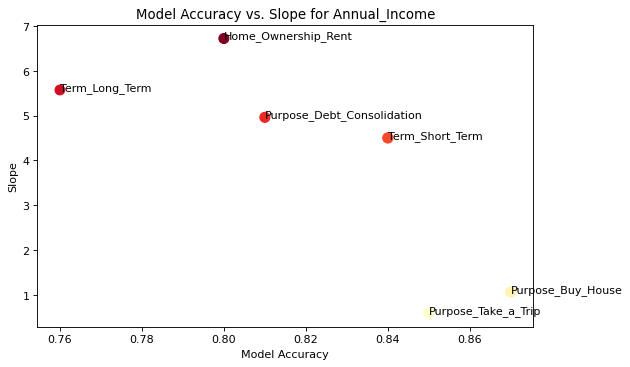

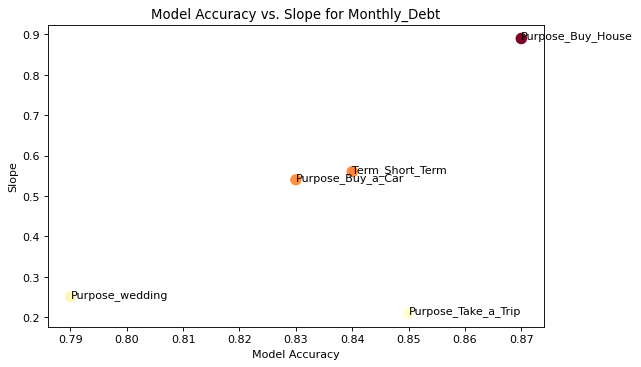

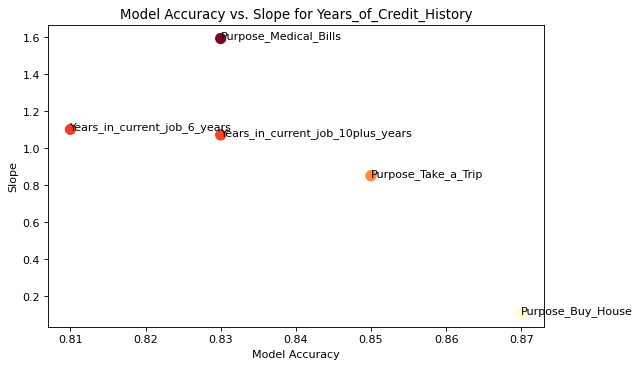

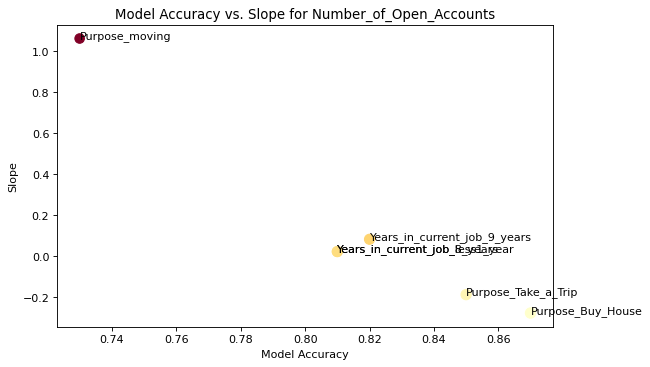

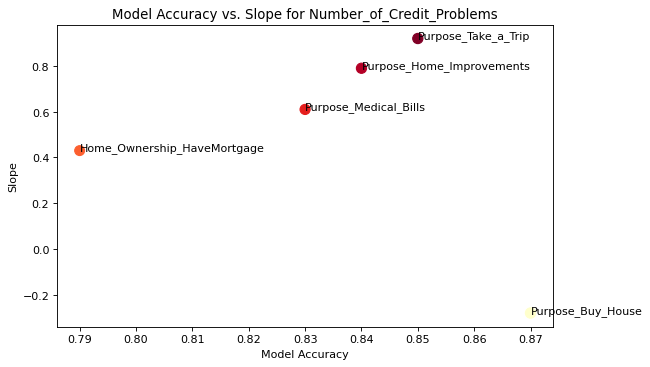

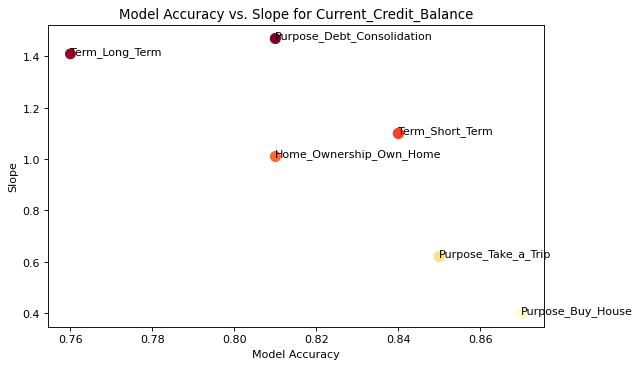

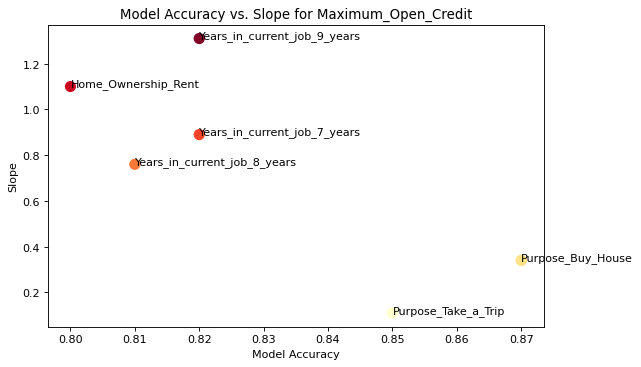

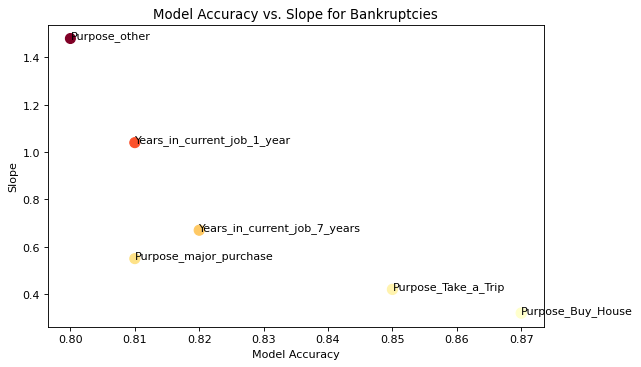

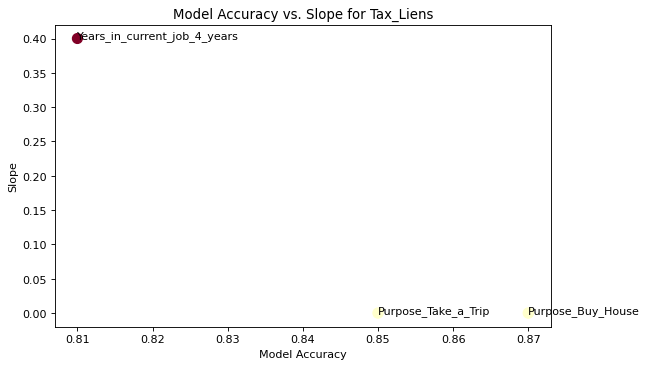

In [304]:
# annotated scatterplots for high accuracy, high slope "influential" features

slope_list = summary.drop(['Segment', 'Accuracy'], axis=1)

for slope_col in slope_list:
    
    top_5_acc = summary['Accuracy'].nlargest(n=5)
    top_5_slope = summary[slope_col].nlargest(n=5)
    mintop5acc = min(top_5_acc)
    mintop5slope = min(top_5_slope)

    top5 = summary[(summary['Accuracy'] > mintop5acc) | (summary[slope_col] > mintop5slope)].reset_index()

    x = top5['Accuracy']
    y = top5[slope_col]
    labels = top5['Segment']

    plt.figure(figsize=(8,5), dpi=80)
    plt.scatter(x, y, s= 100*x, c=y, cmap='YlOrRd')

    plt.xlabel('Model Accuracy', size=10)
    plt.ylabel('Slope', size=10)
    plt.title('Model Accuracy vs. Slope for {}'.format(slope_col), size = 12)
    for i, label in enumerate(labels):
        plt.annotate(label, (x[i], y[i]), size=10)
    plt.show()

The observations noted from each scatterplot may be used as a basis from which to formalize a more individualized, customer oriented approach to loan acceptance criteria.  Normalizing raw data, while mitigating outliers and missing values then using recursive feature elimination with cross-validation can go a long way to promote accurate models.  However, higher model accuracies may be more desirable before implementing any policies based on these current results.  Other parameters involving L1 and L2 regularization, intercept scaling, and solver specification could also be used with cross validation. (Hale, 2019)  Colinearity amongst predictor variables was not examined in this treatment, but surely could have been.  The same can be said for interactions with 2 or even more predictor columns. 

It would also be interesting to see how applying principal component analysis and clustering might affect choices in predictor columns to be used in the final model summaries.  In a sense, the results found from the 30 models serve as a form of feature importance selection.  I wonder if similar conclusions could be made from a feature importance extract if the *Term*, *Years in current job*, *Home Ownership* and *Purpose* columns were one-hot encoded for use in a single multi-logit or even tree-based model.  

*Current Loan Amount* was used as a predictor column in this analysis, but it could be used as a target variable for linear regression models using the same subsetting methodology. Slope coeffients, and R^2 instead of accuracy can also be used to find key drivers that influence loan amounts.  Boosting and even applying polynomial regression may be ways to explore enhancing predictive accuracy.  Likewise, using unsupervised machine learning techniques to group predictive features may be implemented prior to final model analysis.  Feature importance from tree-based models could also be applied to this kind of regression task, with paramaters such as gini-index and number of features per node considered for optimization.

In [305]:
credit['Current_Loan_Amount'].sum()

1176044738946.0

With over 1 trillion dollars in loans issued, it would only be prudent to consider this detailed application of a single model type as only one of many influential paths towards determining loan approval criteria.  In the grander scheme of such an effort, it has been at least verified that this segmented application of logistic classification models can lead to some conclusive results pertaining to a more customized approval checklist that predicts payoff likelihood to a relatively high accuracy.  Indeed, there are many more data science and machine learning avenues to persue in longer, and likely more team project oriented efforts to customize customer attributes when better automating loan approval processes.



# References


Brownlee, Jason.  (2020, May 28).  Recursive Feature Elimination (RFE) for Feature Selection in Python.  Machine Learning Mastery.  https://machinelearningmastery.com/rfe-feature-selection-in-python/

Scikit Learn.  (n.d.). sklearn.preprocessing.MinMaxScaler.  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Zach.  (2021, September 9). What is Considered a Good AUC Score?  Statology.  https://www.statology.org/what-is-a-good-auc-score/

Hale, Jeff.  (2019, September 26). Don't Sweat the Solver Stuff.  Tips for Better Logistic Regression Models in Scikit-Learn. Towards Data Science.  https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451